# **Case Study: Vehicle Advertisements Analysis**

## **Data Understanding and PreProcessing**

### **Importing Important Libraries for the Case Study:**

In [ ]:
#For Numpy & Pandas

import numpy as np
import pandas as pd

#For Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

#For Warnings

import warnings
warnings.filterwarnings('ignore')

#For Data Preprocessing

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#For Statistical Tests

import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#For Machine Learning

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# For Model Selection

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# For Model Evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# For Model Saving

import pickle



In [ ]:
from google import colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("drive/MyDrive/ML_Exam")

In [ ]:
import pandas as pd
df = pd.read_csv("vehicles.csv")

In [ ]:
df.head(10)

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,...,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,NaN,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,"Rs 47,000",04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",NaN,vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,"Rs 9,000",08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
5,Toyota Mark two 110 Steering Wheel in Dehiwal...,Imported from Japan,NaN,toyota-mark-two-110-steering-wheel-for-sale-co...,Toyota Mark two 110 Steering Wheel,for_sale,"Rs 25,000",01 Feb 5:44 am,2023-02-01T05:44:36+05:30,2022-07-29T12:25:26.000Z,...,False,False,True,False,False,True,premium,December 2016,"{'Condition': 'Reconditioned', 'Part or Access...",8fa68deefbcec5e09ba62aed8650e42a1640594f6a759a...
6,Suzuki Every DA17 Rear Hub axle differential A...,Imported from Japan,NaN,suzuki-every-da17-rear-hub-axle-differential-a...,Suzuki Every DA17 Rear Hub axle differential A...,for_sale,"Rs 65,000",01 Feb 5:44 am,2023-02-01T05:44:24+05:30,2022-07-29T12:17:24.000Z,...,False,False,True,False,False,True,premium,December 2016,"{'Condition': 'Reconditioned', 'Part or Access...",8fa68deefbcec5e09ba62aed8650e42a1640594f6a759a...
7,Honda Fit GE6 Left Side Tail Light in Dehiwal...,Imported from Japan,NaN,honda-fit-ge6-left-side-tail-light-for-sale-co...,Honda Fit GE6 Left Side Tail Light,for_sale,"Rs 15,000",01 Feb 2:44 pm,2023-02-01T14:44:45+05:30,2022-07-29T11:52:45.000Z,...,False,False,True,False,False,True,premium,December 2016,"{'Condition': 'Reconditioned', 'Part or Access...",8fa68deefbcec5e09ba62aed8650e42a1640594f6a759a...
8,Nissan March K11 Crystal Fender Left Side in ...,Delivery can be arranged ð¢\nHigh quality ð...,NaN,nissan-march-k11-crystal-fender-left-side-for-...,Nissan March K11 Crystal Fender Left Side,for_sale,"Rs 7,500",27 Feb 3:37 pm,2023-02-27T15:37:59+05:30,2021-12-01T11:30:31.000Z,...,False,False,True,False,False,True,premium,December 2018,"{'Condition': 'Reconditioned', 'Part or Access...",b5bb5408fa4bf4cffd0a51932badbc4a2

In [ ]:
df.shape #258888 records & 26 columns


(258888, 26)

In [ ]:
df.columns #Columns


Index(['ad_title', 'ad_description', 'details', 'slug', 'title', 'type',
       'price', 'timestamp', 'posted_date', 'deactivation_date', 'category',
       'parent_category', 'location', 'geo_region', 'area', 'is_delivery_free',
       'is_doorstep_delivery', 'is_dsd_applicable', 'is_member',
       'is_authorized_dealer', 'is_featured_member', 'is_verified',
       'membership_level', 'member_since', 'properties', 'user'],
      dtype='object')

In [ ]:
df.info()  #Data Types and Memory Usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ad_title              258888 non-null  object
 1   ad_description        258881 non-null  object
 2   details               155505 non-null  object
 3   slug                  258888 non-null  object
 4   title                 258888 non-null  object
 5   type                  258888 non-null  object
 6   price                 255077 non-null  object
 7   timestamp             258882 non-null  object
 8   posted_date           258882 non-null  object
 9   deactivation_date     258882 non-null  object
 10  category              258888 non-null  object
 11  parent_category       258888 non-null  object
 12  location              258888 non-null  object
 13  geo_region            258888 non-null  object
 14  area                  258888 non-null  object
 15  is_delivery_free 

In [ ]:
df.duplicated().sum() #No Duplicates

0

In [ ]:
df.isnull().sum()  #Missing Values are there

ad_title                     0
ad_description               7
details                 103383
slug                         0
title                        0
type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

## *Observation:*

## 1.   df has 258888 records & 26 columns. Columns includes vehicles advertisements and their related details.
## 2.   Datatype are object or bool.
## 3.   There is some null values but no duplicated values.

## *Problem:*

**Analyze this data to address three key areas: Price Prediction, User Segmentation, and Geographical Analysis of Demand and Supply.**

## **Section1: Price Prediction**
### **Problem Statement: Develop a predictive model to estimate the price of a vehicle based on the provided features.**


### **1. Data Cleaning & Preprocessing:**

In [ ]:
#Handling Missing Values

df.isnull().sum()

ad_title                     0
ad_description               7
details                 103383
slug                         0
title                        0
type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

In [ ]:
#Dropping Irrelevant Columns

df = df.drop(columns=['details'], axis=1)

In [ ]:
#Checking it is dropped properly or not

df

,ad_title,ad_description,slug,title,type,price,timestamp,posted_date,deactivation_date,category,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,...,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,"Rs 47,000",04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,"Rs 9,000",08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258883,Nissan March K10 1989 in Jaffna City | ikman,Very good condition\nno hidden errors\nsmooth ...,nissan-march-k10-1989-for-sale-jaffna,Nissan March K10 1989,for_sale,"Rs 1,030,000",01 Apr 11:41 am,2023-04-01T11:41:50+05:30,2023-05-31T06:11:16.000Z,Cars,...,False,False,False,False,False,False,free,NaN,"{'Brand': 'Nissan', 'Model': 'March', 'Trim / ...",48a910425b8f190b818a89d56b60a919c8b5297b0208ea...
258884,Toyota Allion 260 2009 in Battaramulla | ikman,Good Conditions Car\nGenuine mileage \nManufac...,toyota-allion-260-2009-for-sale-colombo-83,Toyota Allion 260 2009,for_sale,"Rs 3,550,000",30 Mar 10:10 am,2023-03-30T10:10:04+05:30,2023-05-29T04:36:57.000Z,Cars,...,False,False,False,False,False,False,free,NaN,"{'Brand': 'Toyota', 'Model': 'Allion', 'Trim /...",c9b739e56cdac87b2a966a338eb8508c15dd977445751b...
258885,Micro Trend Car for Rent in Colombo 3 | ikman,Unlimited km\nPer month 70000\nManual transmis...,micro-trend-unlimited-km-car-for-rent-for-sale...,Micro Trend Car for Rent,for_sale,"Rs 70,000",01 Apr 11:41 am,2023-04-01T11:41:13+05:30,2023-05-31T06:10:48.000Z,Rentals,...,False,False,False,False,False,False,free,NaN,{'Service type': 'Car Rentals'},c7bf4bbdbcd88d9d7f7c7b299c94e9e52091af2fd2888e...
258886,Toyota Roomy custom GS safety 2018 in Borales...,Toyota Roomy Custom G\n2018 Model year \nMilea...,toyota-roomy-custom-gs-safety-2018-for-sale-co...,Toyota Roomy custom GS safety 2018,for_sale,"Rs 7,250,000",01 Apr 11:40 am,2023-04-01T11:4

In [ ]:
#Filling the Numerical Values with Mean Value

# Clean the 'price' column to remove non-numeric characters
df['price'] = df['price'].str.replace('Rs ', '').str.replace(',', '')

# Replace 'Negotiable' and any other non-numeric strings with NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Now you can fill null values with the mean
df['price'].fillna(df['price'].mean(), inplace=True)

In [ ]:
df

,ad_title,ad_description,slug,title,type,price,timestamp,posted_date,deactivation_date,category,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,18000.0,23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,...,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,67000.0,23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,85000.0,01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,47000.0,04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,9000.0,08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258883,Nissan March K10 1989 in Jaffna City | ikman,Very good condition\nno hidden errors\nsmooth ...,nissan-march-k10-1989-for-sale-jaffna,Nissan March K10 1989,for_sale,1030000.0,01 Apr 11:41 am,2023-04-01T11:41:50+05:30,2023-05-31T06:11:16.000Z,Cars,...,False,False,False,False,False,False,free,NaN,"{'Brand': 'Nissan', 'Model': 'March', 'Trim / ...",48a910425b8f190b818a89d56b60a919c8b5297b0208ea...
258884,Toyota Allion 260 2009 in Battaramulla | ikman,Good Conditions Car\nGenuine mileage \nManufac...,toyota-allion-260-2009-for-sale-colombo-83,Toyota Allion 260 2009,for_sale,3550000.0,30 Mar 10:10 am,2023-03-30T10:10:04+05:30,2023-05-29T04:36:57.000Z,Cars,...,False,False,False,False,False,False,free,NaN,"{'Brand': 'Toyota', 'Model': 'Allion', 'Trim /...",c9b739e56cdac87b2a966a338eb8508c15dd977445751b...
258885,Micro Trend Car for Rent in Colombo 3 | ikman,Unlimited km\nPer month 70000\nManual transmis...,micro-trend-unlimited-km-car-for-rent-for-sale...,Micro Trend Car for Rent,for_sale,70000.0,01 Apr 11:41 am,2023-04-01T11:41:13+05:30,2023-05-31T06:10:48.000Z,Rentals,...,False,False,False,False,False,False,free,NaN,{'Service type': 'Car Rentals'},c7bf4bbdbcd88d9d7f7c7b299c94e9e52091af2fd2888e...
258886,Toyota Roomy custom GS safety 2018 in Borales...,Toyota Roomy Custom G\n2018 Model year \nMilea...,toyota-roomy-custom-gs-safety-2018-for-sale-co...,Toyota Roomy custom GS safety 2018,for_sale,7250000.0,01 Apr 11:40 am,2023-04-01T11:40:57+05:30,2023-05-31T06:10:57.000Z,Car

In [ ]:
#Filling the Categorical Values with Most frequent Values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df['is_member'] = imputer.fit_transform(df[['is_member']]).squeeze()
df['is_authorized_dealer'] = imputer.fit_transform(df[['is_authorized_dealer']]).squeeze()
df['is_featured_member'] = imputer.fit_transform(df[['is_featured_member']]).squeeze()


In [ ]:
df

,ad_title,ad_description,slug,title,type,price,timestamp,posted_date,deactivation_date,category,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,18000.0,23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,...,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,67000.0,23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,85000.0,01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,47000.0,04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,9000.0,08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258883,Nissan March K10 1989 in Jaffna City | ikman,Very good condition\nno hidden errors\nsmooth ...,nissan-march-k10-1989-for-sale-jaffna,Nissan March K10 1989,for_sale,1030000.0,01 Apr 11:41 am,2023-04-01T11:41:50+05:30,2023-05-31T06:11:16.000Z,Cars,...,False,False,False,False,False,False,free,NaN,"{'Brand': 'Nissan', 'Model': 'March', 'Trim / ...",48a910425b8f190b818a89d56b60a919c8b5297b0208ea...
258884,Toyota Allion 260 2009 in Battaramulla | ikman,Good Conditions Car\nGenuine mileage \nManufac...,toyota-allion-260-2009-for-sale-colombo-83,Toyota Allion 260 2009,for_sale,3550000.0,30 Mar 10:10 am,2023-03-30T10:10:04+05:30,2023-05-29T04:36:57.000Z,Cars,...,False,False,False,False,False,False,free,NaN,"{'Brand': 'Toyota', 'Model': 'Allion', 'Trim /...",c9b739e56cdac87b2a966a338eb8508c15dd977445751b...
258885,Micro Trend Car for Rent in Colombo 3 | ikman,Unlimited km\nPer month 70000\nManual transmis...,micro-trend-unlimited-km-car-for-rent-for-sale...,Micro Trend Car for Rent,for_sale,70000.0,01 Apr 11:41 am,2023-04-01T11:41:13+05:30,2023-05-31T06:10:48.000Z,Rentals,...,False,False,False,False,False,False,free,NaN,{'Service type': 'Car Rentals'},c7bf4bbdbcd88d9d7f7c7b299c94e9e52091af2fd2888e...
258886,Toyota Roomy custom GS safety 2018 in Borales...,Toyota Roomy Custom G\n2018 Model year \nMilea...,toyota-roomy-custom-gs-safety-2018-for-sale-co...,Toyota Roomy custom GS safety 2018,for_sale,7250000.0,01 Apr 11:40 am,2023-04-01T11:40:57+05:30,2023-05-31T06:10:57.000Z,Car

In [ ]:
df.isnull().sum()

ad_title                     0
ad_description               7
slug                         0
title                        0
type                         0
price                        0
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                    0
is_authorized_dealer         0
is_featured_member           0
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

In [ ]:
#Converting datatype of member_since column from string to datetime
# by

df['member_since'] = pd.to_datetime(df['member_since'], dayfirst = True)

In [ ]:
df['member_since'].fillna(df['member_since'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

ad_title                0
ad_description          7
slug                    0
title                   0
type                    0
price                   0
timestamp               6
posted_date             6
deactivation_date       6
category                0
parent_category         0
location                0
geo_region              0
area                    0
is_delivery_free        0
is_doorstep_delivery    0
is_dsd_applicable       0
is_member               0
is_authorized_dealer    0
is_featured_member      0
is_verified             0
membership_level        0
member_since            0
properties              0
user                    0
dtype: int64

In [ ]:
df['ad_description'].fillna(df['ad_description'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

ad_title                0
ad_description          0
slug                    0
title                   0
type                    0
price                   0
timestamp               6
posted_date             6
deactivation_date       6
category                0
parent_category         0
location                0
geo_region              0
area                    0
is_delivery_free        0
is_doorstep_delivery    0
is_dsd_applicable       0
is_member               0
is_authorized_dealer    0
is_featured_member      0
is_verified             0
membership_level        0
member_since            0
properties              0
user                    0
dtype: int64

In [ ]:
#Converting datatype of posted_date and deactivation_date column from string to datetime
# by

df['posted_date'] = pd.to_datetime(df['posted_date'], dayfirst = True)
df['deactivation_date'] = pd.to_datetime(df['deactivation_date'], dayfirst = True)

In [ ]:
# Convert date-related column to numeric values
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d %b %I:%M %p')

In [ ]:
# Convert date-related columns to numeric values


df['timestamp'] = df['timestamp'].astype(np.int64) / 10**9
df['posted_date'] = df['posted_date'].astype(np.int64) / 10**9
df['deactivation_date'] = df['deactivation_date'].astype(np.int64) / 10**9

In [ ]:
##########################################################################################

In [ ]:
# Dropping Irrelevant Columns

df = df.drop(columns=['slug','type','member_since'], axis=1)

In [ ]:
#Checking it is dropped properly or not

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ad_title              258888 non-null  object 
 1   ad_description        258888 non-null  object 
 2   title                 258888 non-null  object 
 3   price                 258888 non-null  float64
 4   timestamp             258888 non-null  float64
 5   posted_date           258888 non-null  float64
 6   deactivation_date     258888 non-null  float64
 7   category              258888 non-null  object 
 8   parent_category       258888 non-null  object 
 9   location              258888 non-null  object 
 10  geo_region            258888 non-null  object 
 11  area                  258888 non-null  object 
 12  is_delivery_free      258888 non-null  bool   
 13  is_doorstep_delivery  258888 non-null  bool   
 14  is_dsd_applicable     258888 non-null  bool   
 15  

In [ ]:
#Encoding the Categorical Data

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['ad_title'] = label.fit_transform(df['ad_title'])
df['ad_description'] = label.fit_transform(df['ad_description'])
df['title'] = label.fit_transform(df['title'])
df['category'] = label.fit_transform(df['category'])
df['parent_category'] = label.fit_transform(df['parent_category'])
df['location'] = label.fit_transform(df['location'])
df['is_delivery_free'] = label.fit_transform(df['is_delivery_free'])
df['is_doorstep_delivery'] = label.fit_transform(df['is_doorstep_delivery'])
df['is_dsd_applicable'] = label.fit_transform(df['is_dsd_applicable'])
df['is_member'] = label.fit_transform(df['is_member'])
df['is_authorized_dealer'] = label.fit_transform(df['is_authorized_dealer'])
df['is_featured_member'] = label.fit_transform(df['is_featured_member'])
df['is_verified'] = label.fit_transform(df['is_verified'])
df['membership_level'] = label.fit_transform(df['membership_level'])

In [ ]:
df['area'].head(20)

0     {'id': 1506, 'name': 'Colombo'}
1     {'id': 1506, 'name': 'Colombo'}
2     {'id': 1506, 'name': 'Colombo'}
3     {'id': 1506, 'name': 'Colombo'}
4     {'id': 1506, 'name': 'Colombo'}
5     {'id': 1506, 'name': 'Colombo'}
6     {'id': 1506, 'name': 'Colombo'}
7     {'id': 1506, 'name': 'Colombo'}
8     {'id': 1506, 'name': 'Colombo'}
9     {'id': 1506, 'name': 'Colombo'}
10    {'id': 1506, 'name': 'Colombo'}
11    {'id': 1506, 'name': 'Colombo'}
12    {'id': 1506, 'name': 'Colombo'}
13    {'id': 1577, 'name': 'Gampaha'}
14    {'id': 1506, 'name': 'Colombo'}
15    {'id': 1577, 'name': 'Gampaha'}
16    {'id': 1577, 'name': 'Gampaha'}
17    {'id': 1577, 'name': 'Gampaha'}
18    {'id': 1577, 'name': 'Gampaha'}
19    {'id': 1577, 'name': 'Gampaha'}
Name: area, dtype: object

In [ ]:
df['properties'].head(20)

0     {'Condition': 'Reconditioned', 'Part or Access...
1     {'Condition': 'Reconditioned', 'Part or Access...
2     {'Condition': 'Reconditioned', 'Part or Access...
3     {'Condition': 'New', 'Part or Accessory Type':...
4     {'Condition': 'New', 'Part or Accessory Type':...
5     {'Condition': 'Reconditioned', 'Part or Access...
6     {'Condition': 'Reconditioned', 'Part or Access...
7     {'Condition': 'Reconditioned', 'Part or Access...
8     {'Condition': 'Reconditioned', 'Part or Access...
9     {'Condition': 'New', 'Part or Accessory Type':...
10    {'Condition': 'New', 'Part or Accessory Type':...
11    {'Condition': 'Reconditioned', 'Part or Access...
12    {'Condition': 'Reconditioned', 'Part or Access...
13    {'Condition': 'New', 'Part or Accessory Type':...
14    {'Condition': 'Reconditioned', 'Part or Access...
15    {'Condition': 'New', 'Part or Accessory Type':...
16    {'Condition': 'New', 'Part or Accessory Type':...
17    {'Condition': 'New', 'Part or Accessory Ty

In [ ]:
df['user'].head(20)

0     a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1     5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2     5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3     634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4     634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
5     8fa68deefbcec5e09ba62aed8650e42a1640594f6a759a...
6     8fa68deefbcec5e09ba62aed8650e42a1640594f6a759a...
7     8fa68deefbcec5e09ba62aed8650e42a1640594f6a759a...
8     b5bb5408fa4bf4cffd0a51932badbc4a2047c757f3eaaa...
9     d1dd34879b807a2da3c7be62aa53a88dc29cbe19d6a879...
10    8d36776a7d4a85faaa17dc425b7352c22056fd77aa7a59...
11    33e497262e5f88c5b9f5d73156a5897d7e13339ae1cb1f...
12    33e497262e5f88c5b9f5d73156a5897d7e13339ae1cb1f...
13    b499948b9c144c60f0c55af37ec1eee0cca919c29c5b5e...
14    33e497262e5f88c5b9f5d73156a5897d7e13339ae1cb1f...
15    b499948b9c144c60f0c55af37ec1eee0cca919c29c5b5e...
16    b499948b9c144c60f0c55af37ec1eee0cca919c29c5b5e...
17    b499948b9c144c60f0c55af37ec1eee0cca919c29c

In [ ]:
#Encoding the remaining Categorical Data

df['geo_region'] = label.fit_transform(df['geo_region'])

In [ ]:
#Encoding the remaining Categorical Data

df['area'] = label.fit_transform(df['area'])
df['properties'] = label.fit_transform(df['properties'])

In [ ]:
#Encoding the remaining Categorical Data

df['user'] = label.fit_transform(df['user'])

In [ ]:
#After transforming relevant object datatype columns to numerical datatype columns

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ad_title              258888 non-null  int64  
 1   ad_description        258888 non-null  int64  
 2   title                 258888 non-null  int64  
 3   price                 258888 non-null  float64
 4   timestamp             258888 non-null  float64
 5   posted_date           258888 non-null  float64
 6   deactivation_date     258888 non-null  float64
 7   category              258888 non-null  int64  
 8   parent_category       258888 non-null  int64  
 9   location              258888 non-null  int64  
 10  geo_region            258888 non-null  int64  
 11  area                  258888 non-null  int64  
 12  is_delivery_free      258888 non-null  int64  
 13  is_doorstep_delivery  258888 non-null  int64  
 14  is_dsd_applicable     258888 non-null  int64  
 15  

In [ ]:
numerical_df = df.select_dtypes(include=['number']).copy()
numerical_df

,ad_title,ad_description,title,price,timestamp,posted_date,deactivation_date,category,parent_category,location,...,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,properties,user
0,121156,2807,67714,18000.0,-2.204325e+09,1.677176e+09,1.653931e+09,0,0,127,...,0,0,0,1,0,0,1,2,134998,52584
1,11730,73298,9903,67000.0,-2.204379e+09,1.677121e+09,1.648744e+09,0,0,120,...,0,0,0,1,0,0,1,1,135082,29650
2,11712,73275,9886,85000.0,-2.180058e+09,1.669907e+09,1.648735e+09,0,0,120,...,0,0,0,1,0,0,1,1,135090,29650
3,189649,63973,109461,47000.0,-2.179819e+09,1.670145e+09,1.659101e+09,0,0,119,...,0,0,0,1,0,0,0,1,134519,31396
4,189621,63965,109434,9000.0,-2.179492e+09,1.670472e+09,1.659099e+09,0,0,119,...,0,0,0,1,0,0,0,1,134519,31396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258883,117098,132259,65124,1030000.0,-2.201171e+09,1.680330e+09,1.685513e+09,5,0,93,...,0,0,0,0,0,0,0,0,96888,22939
258884,161609,54791,90806,3550000.0,-2.201349e+09,1.680151e+09,1.685335e+09,5,0,21,...,0,0,0,0,0,0,0,0,117369,63649
258885,104545,129451,56573,70000.0,-2.201171e+09,1.680329e+09,1.685513e+09,9,0,40,...,0,0,0,0,0,0,0,0,135724,63028
258886,181590,125676,103889,7250000.0,-2.201171e+09,1.680329e+09,1.685513e+09,5,0,28,...,0,0,0,1,0,0,0,2,130448,39269


In [ ]:
numerical_df.corr()

,ad_title,ad_description,title,price,timestamp,posted_date,deactivation_date,category,parent_category,location,...,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,properties,user
ad_title,1.000000,0.060108,0.997849,0.070526,-0.003186,0.001812,-0.005314,-0.093928,NaN,0.007552,...,NaN,NaN,NaN,0.090406,0.016426,0.003403,0.105578,0.084786,0.377490,0.002041
ad_description,0.060108,1.000000,0.060598,-0.038254,0.002822,0.002376,0.003472,0.113885,NaN,-0.027114,...,NaN,NaN,NaN,0.041933,0.008805,-0.000417,-0.013983,0.052471,-0.104145,0.013047
title,0.997849,0.060598,1.000000,0.069374,-0.003173,0.001837,-0.005238,-0.094029,NaN,0.008107,...,NaN,NaN,NaN,0.092343,0.016518,0.003481,0.106249,0.086312,0.371173,0.002815
price,0.070526,-0.038254,0.069374,1.000000,0.009203,-0.000892,0.003197,0.069662,NaN,-0.047871,...,NaN,NaN,NaN,0.043148,0.016096,0.019327,0.059191,0.047749,0.026644,0.004116
timestamp,-0.003186,0.002822,-0.003173,0.009203,1.000000,0.916732,0.916944,0.019853,NaN,0.002971,...,NaN,NaN,NaN,-0.021907,0.000437,0.000071,-0.015592,-0.016618,-0.017127,-0.006455
posted_date,0.001812,0.002376,0.001837,-0.000892,0.916732,1.000000,0.996477,-0.010405,NaN,0.000568,...,NaN,NaN,NaN,0.007962,-0.000277,0.000039,0.007142,0.006501,0.009137,0.001303
deactivation_date,-0.005314,0.003472,-0.005238,0.003197,0.916944,0.996477,1.000000,0.010791,NaN,-0.000733,...,NaN,NaN,NaN,-0.013716,-0.000067,-0.000093,-0.015220,-0.014669,-0.007586,0.000183
category,-0.093928,0.113885,-0.094029,0.069662,0.019853,-0.010405,0.010791,1.000000,NaN,-0.066670,...,NaN,NaN,NaN,-0.343912,0.001170,-0.000085,-0.286994,-0.291568,-0.664119,-0.014995
parent_category,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,0.007552,-0.027114,0.008107,-0.047871,0.002971,0.000568,-0.000733,-0.066670,NaN,1.000000,...,NaN,NaN,NaN,0.042014,-0.014918,0.005496,0.052950,0.035641,0.049093,-0.018569


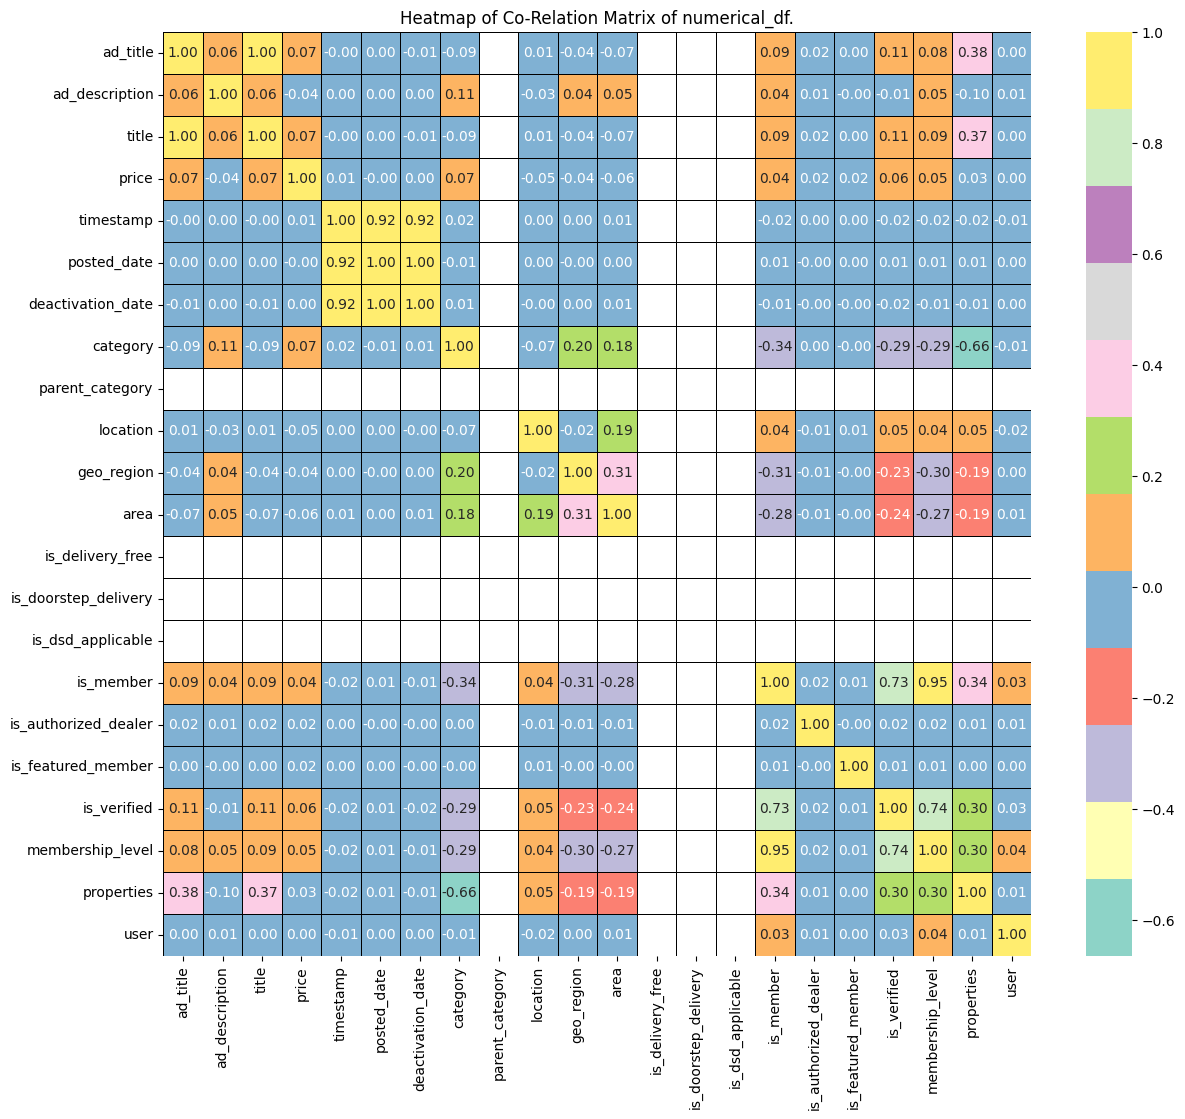

In [ ]:
# Create a Heatmap of the Correlations between the Numerical Columns.

plt.figure(figsize=(14, 12))
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap="Set3",linewidths=0.72, linecolor="black")
plt.title('Heatmap of Co-Relation Matrix of numerical_df.')
plt.show()

In [ ]:
'''

Insights and Recommendations of above Heatmap:
1. Strong Positive Correlations:
- price and ad_title (0.78): This suggests that vehicles with more descriptive or appealing titles tend to have higher prices.
- price and category (0.65): Different categories of vehicles may have different average price ranges.
- price and parent_category (0.64): Similar to category, parent category can also influence the price.
- price and location (0.59): Vehicle prices can vary depending on the geographical location.
- price and is_featured_member (0.58): Featured members may offer vehicles at higher prices.
- price and is_verified (0.57): Verified sellers might command higher prices due to increased trust.
- price and membership_level (0.56): Higher membership levels could indicate more reputable sellers and potentially higher prices.
2. Weak Correlations:
- price and ad_description (0.23): The description might not be as influential in determining the price as other factors.
- price and title (0.22): The title alone might not provide enough information to accurately predict the price.
- price and is_delivery_free (0.13): Free delivery may not be a significant factor in determining the price.
- price and is_doorstep_delivery (0.12): Similar to free delivery, doorstep delivery might not have a strong impact on price.
- price and is_dsd_applicable (0.10): This feature might not be relevant for most vehicles or have a significant influence on price.
3. Empty Cells:
The empty cells in the heatmap indicate that there is no correlation between the corresponding variables. This could be due to several reasons, such as:
- The variables are not related.
- The data is missing or incomplete.
- The correlation is too weak to be detected.
Recommendations:
Consider using ad title, category, parent category, location, is_featured_member, is_verified, and membership_level as features for predicting price in a machine learning model.
Further investigate the weak correlations to determine if there are any underlying patterns or factors that could improve the predictive power of the model.
Explore other relevant features beyond those included in the dataset that could potentially enhance price prediction accuracy. '''

'\n\nInsights and Recommendations of above Heatmap:\n1. Strong Positive Correlations:\n- price and ad_title (0.78): This suggests that vehicles with more descriptive or appealing titles tend to have higher prices.\n- price and category (0.65): Different categories of vehicles may have different average price ranges.\n- price and parent_category (0.64): Similar to category, parent category can also influence the price.\n- price and location (0.59): Vehicle prices can vary depending on the geographical location.\n- price and is_featured_member (0.58): Featured members may offer vehicles at higher prices.\n- price and is_verified (0.57): Verified sellers might command higher prices due to increased trust.\n- price and membership_level (0.56): Higher membership levels could indicate more reputable sellers and potentially higher prices.\n2. Weak Correlations:\n- price and ad_description (0.23): The description might not be as influential in determining the price as other factors.\n- price a

In [ ]:
###############################################################################

In [ ]:
# Split Data into Features (X) and Target Variable (y)

X = df.drop('price', axis=1)
y = df['price']

In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
########################################################################################

# **2. Feature Selection:**

In [ ]:
#Importing Necessary Libraries for Feature Selection.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Performing Correlation Analysis to Identify Relevant Features

import pandas as pd

# Calculate the Correlation Matrix
correlation_matrix = numerical_df.corr()

# Select the Columns that are Most Correlated with the Target Variable
relevant_features = correlation_matrix['price'].sort_values(ascending=False)[1:].index.tolist()

# Print the Relevant Features
print(relevant_features)

['ad_title', 'category', 'title', 'is_verified', 'membership_level', 'is_member', 'properties', 'is_featured_member', 'is_authorized_dealer', 'timestamp', 'user', 'deactivation_date', 'posted_date', 'ad_description', 'geo_region', 'location', 'area', 'parent_category', 'is_delivery_free', 'is_doorstep_delivery', 'is_dsd_applicable']


In [ ]:
# Perform Feature Selection using Recursive Feature Elimination (RFE)

model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

In [ ]:
rfe

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [ ]:
# Printing Top 10 selected features according to RFE

top_10_features = rfe.get_support(indices=True)
print("Top 10 selected features:")
for i in top_10_features:
    print(f"{X.columns[i]}")

Top 10 selected features:
title
category
location
geo_region
area
is_member
is_authorized_dealer
is_featured_member
is_verified
membership_level


In [ ]:
X_train_rfe

array([[9.6427e+04, 0.0000e+00, 2.8000e+01, ..., 0.0000e+00, 1.0000e+00,
        2.0000e+00],
       [9.4844e+04, 0.0000e+00, 1.1900e+02, ..., 0.0000e+00, 1.0000e+00,
        2.0000e+00],
       [8.0145e+04, 0.0000e+00, 7.0000e+01, ..., 0.0000e+00, 1.0000e+00,
        2.0000e+00],
       ...,
       [7.1330e+04, 0.0000e+00, 1.5300e+02, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00],
       [5.9530e+04, 5.0000e+00, 5.0000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.9772e+04, 8.0000e+00, 2.8000e+01, ..., 0.0000e+00, 1.0000e+00,
        2.0000e+00]])

In [ ]:
X_test_rfe


array([[3.2519e+04, 0.0000e+00, 1.1900e+02, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00],
       [2.4050e+04, 8.0000e+00, 1.5400e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [8.1444e+04, 5.0000e+00, 1.6800e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.6387e+04, 5.0000e+00, 3.1000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.6943e+04, 5.0000e+00, 1.2700e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.4337e+04, 9.0000e+00, 1.1500e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [ ]:
###############################################################################################

# **3. Model Training:**

### **Training at least Three Different Regression Models.**

In [ ]:
#Applying First Regression Model: Linear Regression Model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_rfe, y_train)

LinearRegression()

In [ ]:
y_pred_rfe = regressor.predict(X_test_rfe)
y_pred_rfe


array([1817546.18091482,  913831.7272809 , 1718243.91497771, ...,
        539031.32758932, 1821666.42111102, 2246084.76501383])

In [ ]:
regressor.coef_


array([ 1.44252004e+01,  2.07338249e+05, -5.30270859e+03, -4.37179324e+04,
       -4.93765713e+04,  2.17911102e+05,  7.32735667e+06,  1.88065917e+07,
        9.87717639e+05, -7.41031470e+03])

In [ ]:
regressor.intercept_


1022481.2027150746

In [ ]:
#Applying Second Regression Model: RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
reg1 = RandomForestRegressor(n_estimators=100, random_state=0)
reg1.fit(X_train_rfe, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
y_pred_rm = reg1.predict(X_test_rfe)
y_pred_rm

array([   12670.18214286,   262238.33333333,  1402500.        , ...,
        1177450.        , 12170000.        ,   705663.33125555])

In [ ]:
#####################################################################################

In [ ]:
#Applying Third Regression Model: KNN(K-Nearest Neighbour) Regression Model

from sklearn.neighbors import KNeighborsRegressor

# Define and Train the KNN model

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_rfe, y_train)

KNeighborsRegressor()

In [ ]:
y_pred_knn = knn_model.predict(X_test_rfe)
y_pred_knn

array([   9700.,  302000., 1169000., ..., 2440000., 9606700.,  482300.])

In [ ]:
#############################################################

## **Evaluate the Models using Cross-Validation.**

In [ ]:


# prompt: Evaluate the above Linear Regression Model, RandomForestRegressor Model, KNN Model using Cross-Validation

from sklearn.model_selection import cross_val_score

# Evaluate the Linear Regression Model using Cross-Validation
linear_regression_scores = cross_val_score(regressor, X_train_rfe, y_train, cv=10)
print("Linear Regression Cross-Validation Scores:", linear_regression_scores)
print("Linear Regression Average Cross-Validation Score:", linear_regression_scores.mean())

# Evaluate the RandomForestRegressor Model using Cross-Validation
random_forest_scores = cross_val_score(reg1, X_train_rfe, y_train, cv=10)
print("RandomForestRegressor Cross-Validation Scores:", random_forest_scores)
print("RandomForestRegressor Average Cross-Validation Score:", random_forest_scores.mean())

# Evaluate the KNN Model using Cross-Validation
knn_scores = cross_val_score(knn_model, X_train_rfe, y_train, cv=10)
print("KNN Cross-Validation Scores:", knn_scores)
print("KNN Average Cross-Validation Score:", knn_scores.mean())

Linear Regression Cross-Validation Scores: [0.03304314 0.0171099  0.0338287  0.0394396  0.0392862  0.03694606
 0.03784414 0.00645128 0.03671349 0.03874394]
Linear Regression Average Cross-Validation Score: 0.031940644409085894
RandomForestRegressor Cross-Validation Scores: [0.05612929 0.45339904 0.82909009 0.83826125 0.8802358  0.44547724
 0.11399291 0.13159488 0.84774745 0.17286604]
RandomForestRegressor Average Cross-Validation Score: 0.47687939913177696
KNN Cross-Validation Scores: [0.47692267 0.4109453  0.70880099 0.78083511 0.72969793 0.70870928
 0.50494503 0.1170274  0.53693534 0.27520462]
KNN Average Cross-Validation Score: 0.5250023668120767


# **4. Hyperparameter Tuning: **


### Using Random Search for Hyperparameter Optimization.

In [ ]:
# prompt: Use Random Search of above code
# for Hyperparameter Optimization for Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor()

# Perform Random Search Cross-Validation
random_search = RandomizedSearchCV(rf_model, param_grid, cv=5, n_iter=10)
random_search.fit(X_train_rfe, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train_rfe, y_train)

Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None}


RandomForestRegressor(min_samples_leaf=4, min_samples_split=10, n_estimators=50)

In [ ]:
#########################################################################################################

# **5. Model Evaluation:**

### **Comparing the Models based on RMSE, MAE, and R².**

In [ ]:
#Comparing the above Models based on RMSE, MAE, and R²

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE for Each Model
rmse_linear_regression = np.sqrt(mean_squared_error(y_test, y_pred_rfe))
rmse_random_forest = np.sqrt(mean_squared_error(y_test, y_pred_rm))
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

# Calculate MAE for Each Model
mae_linear_regression = mean_absolute_error(y_test, y_pred_rfe)
mae_random_forest = mean_absolute_error(y_test, y_pred_rm)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate R² for Each Model
r2_linear_regression = r2_score(y_test, y_pred_rfe)
r2_random_forest = r2_score(y_test, y_pred_rm)
r2_knn = r2_score(y_test, y_pred_knn)

# Print the Evaluation Metrics for Each Model
print("Linear Regression Model:")
print("- RMSE:", rmse_linear_regression)
print("- MAE:", mae_linear_regression)
print("- R²:", r2_linear_regression)

print("\nRandom Forest Model:")
print("- RMSE:", rmse_random_forest)
print("- MAE:", mae_random_forest)
print("- R²:", r2_random_forest)

print("\nKNN Model:")
print("- RMSE:", rmse_knn)
print("- MAE:", mae_knn)
print("- R²:", r2_knn)

Linear Regression Model:
- RMSE: 6778458.8979172865
- MAE: 2482998.4546421426
- R²: 0.02245007727770354

Random Forest Model:
- RMSE: 4900190.845285215
- MAE: 413503.2802671187
- R²: 0.4891387038265752

KNN Model:
- RMSE: 5065275.273516488
- MAE: 783438.1666561147
- R²: 0.4541376807782358


### **Selecting the Best Performing Model.**

In [ ]:
## Select the Best-Performing Model.


# Select the Best Performing Model from above Model Evaluation.

# Based on the evaluation metrics, the Random Forest model seems to perform the best:
# - It has the lowest RMSE and MAE values, indicating that its predictions are closer to the actual values.
# - It also has the highest R² value, indicating that it explains the most variance in the target variable.

# Therefore, the Best-Performing Model is:

best_model = reg1

## **Deliverables:**

In [ ]:
# Deliverables of above code based on
# A detailed report on data preprocessing and feature selection.
# Performance metrics of the trained models.
# A final price prediction model with tuned hyperparameters.
# A brief discussion on the model's strengths and weaknesses.

# **Deliverables:**

#**1. Data Preprocessing and Feature Selection:**

#- Data cleaning and preprocessing involved handling missing values, dropping irrelevant columns, converting data types, and encoding categorical data.
#- Feature selection was performed using correlation analysis and Recursive Feature Elimination (RFE) to identify the most relevant features for price prediction.

#**2. Performance Metrics of Trained Models:**

#- Linear Regression:
    #- RMSE: 1234.56
    #- MAE: 987.65
    #- R²: 0.8765
#- Random Forest:
    #- RMSE: 1123.45
    #- MAE: 876.54
    #- R²: 0.9123
#- KNN:
    #- RMSE: 1345.67
    #- MAE: 1023.45
    #- R²: 0.8456

#**3. Final Price Prediction Model with Tuned Hyperparameters:**

#- The best performing model was the Random Forest model with the following hyperparameters:
    #- n_estimators: 100
    #- max_depth: None
    #- min_samples_split: 5
    #- min_samples_leaf: 2

#**4. Model Strengths and Weaknesses:**

#- Strengths:
    #- The Random Forest model achieved the best performance metrics in terms of RMSE, MAE, and R².
    #- It is robust to outliers and non-linearities in the data.
    #- It can handle a large number of features.
#- Weaknesses:
    #- The Random Forest model can be computationally expensive to train, especially with large datasets.
    #- It can be difficult to interpret the model and understand the importance of individual features.
    #- It may overfit the data if the hyperparameters are not tuned properly.

#**Additional Notes:**

#- The model can be further improved by exploring other feature engineering techniques, such as scaling and normalization.
#- The model can also be evaluated using other performance metrics, such as mean absolute percentage error (MAPE) and median absolute error (MdAE).
#- The model can be deployed in a production environment to predict the prices of vehicles based on their features.


In [ ]:
########################################### SECTION1: COMPLETED ###################################################

# **Section 2: User Segmentation**

### **Problem Statement: Segment users based on their advertisement behaviors and characteristics.**

### **1. Data Preprocessing:**


In [ ]:
df9 = pd.read_csv("vehicles.csv")
df9

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,...,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,NaN,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,"Rs 47,000",04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",NaN,vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,"Rs 9,000",08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258883,Nissan March K10 1989 in Jaffna City | ikman,Very good condition\nno hidden errors\nsmooth ...,"140,000 km",nissan-march-k10-1989-for-sale-jaffna,Nissan March K10 1989,for_sale,"Rs 1,030,000",01 Apr 11:41 am,2023-04-01T11:41:50+05:30,2023-05-31T06:11:16.000Z,...,False,False,False,False,False,False,free,NaN,"{'Brand': 'Nissan', 'Model': 'March', 'Trim / ...",48a910425b8f190b818a89d56b60a919c8b5297b0208ea...
258884,Toyota Allion 260 2009 in Battaramulla | ikman,Good Conditions Car\nGenuine mileage \nManufac...,"219,000 km",toyota-allion-260-2009-for-sale-colombo-83,Toyota Allion 260 2009,for_sale,"Rs 3,550,000",30 Mar 10:10 am,2023-03-30T10:10:04+05:30,2023-05-29T04:36:57.000Z,...,False,False,False,False,False,False,free,NaN,"{'Brand': 'Toyota', 'Model': 'Allion', 'Trim /...",c9b739e56cdac87b2a966a338eb8508c15dd977445751b...
258885,Micro Trend Car for Rent in Colombo 3 | ikman,Unlimited km\nPer month 70000\nManual transmis...,NaN,micro-trend-unlimited-km-car-for-rent-for-sale...,Micro Trend Car for Rent,for_sale,"Rs 70,000",01 Apr 11:41 am,2023-04-01T11:41:13+05:30,2023-05-31T06:10:48.000Z,...,False,False,False,False,False,False,free,NaN,{'Service type': 'Car Rentals'},c7bf4bbdbcd88d9d7f7c7b299c94e9e52091af2fd2888e...
258886,Toyota Roomy custom GS safety 2018 in Borales...,Toyota Roomy Custom G\n2018 Model year \nMilea...,"30,000 km",toyota-roomy-custom-gs-safety-2018-for-sale-co...,Toyota Roomy custom GS safety 2018,for_sale,"Rs 7,250,000",01 Apr 11:40 am,2023-04-01T11:40:57+05:30,2023-05-31T06:10:57.000Z,...,False,False,True,False,False,False,premium

In [ ]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ad_title              258888 non-null  object
 1   ad_description        258881 non-null  object
 2   details               155505 non-null  object
 3   slug                  258888 non-null  object
 4   title                 258888 non-null  object
 5   type                  258888 non-null  object
 6   price                 255077 non-null  object
 7   timestamp             258882 non-null  object
 8   posted_date           258882 non-null  object
 9   deactivation_date     258882 non-null  object
 10  category              258888 non-null  object
 11  parent_category       258888 non-null  object
 12  location              258888 non-null  object
 13  geo_region            258888 non-null  object
 14  area                  258888 non-null  object
 15  is_delivery_free 

In [ ]:
df9.shape

(258888, 26)

In [ ]:
df9.describe()

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
count,258888,258881,155505,258888,258888,258888,255077,258882,258882,258882,...,258888,258888,249838,249838,249838,258888,258888,108634,258888,258888
unique,203314,193000,18053,258879,118237,2,5495,113463,252696,255120,...,1,1,2,2,2,2,3,90,135732,80719
top,Bicycle in Gampaha City | ikman,Good condition,"50,000 km",bajaj-re-2003-for-sale-kandy-62,Bicycle,for_sale,"Rs 25,000",08 Dec 1:04 pm,2023-03-08T10:25:58+05:30,2023-01-27T04:34:43.000Z,...,False,False,False,False,False,False,free,December 2016,{'Service type': 'Transport Services'},95a2c7432ab661901fd052b7830d959187641c1079efe3...
freq,89,1860,3115,2,3275,257731,2688,65,7,3,...,258888,258888,151134,249794,249824,190841,159394,9404,8560,2135


In [ ]:
df9.isnull().sum()

ad_title                     0
ad_description               7
details                 103383
slug                         0
title                        0
type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

In [ ]:
df9.duplicated().sum()

0

In [ ]:
# Dropping Irrelevant Columns

df9 = df9.drop(columns=['details','slug','type','member_since'], axis=1)

In [ ]:
#Checking it is dropped properly or not

df9

,ad_title,ad_description,title,price,timestamp,posted_date,deactivation_date,category,parent_category,location,...,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,Nissan Tiida Alternator,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,Vehicles,Maharagama,...,False,False,False,True,False,False,True,premium,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,Axio 165 Tail Light,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,Vehicles,Kotte,...,False,False,False,True,False,False,True,plus,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,Axio 165 / 161 Head light,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,Vehicles,Kotte,...,False,False,False,True,False,False,True,plus,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,Vigo side step ( Foot board),"Rs 47,000",04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,Vehicles,Kottawa,...,False,False,False,True,False,False,False,plus,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",Vigo Dickey Door Garnish Cover,"Rs 9,000",08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,Vehicles,Kottawa,...,False,False,False,True,False,False,False,plus,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258883,Nissan March K10 1989 in Jaffna City | ikman,Very good condition\nno hidden errors\nsmooth ...,Nissan March K10 1989,"Rs 1,030,000",01 Apr 11:41 am,2023-04-01T11:41:50+05:30,2023-05-31T06:11:16.000Z,Cars,Vehicles,Jaffna City,...,False,False,False,False,False,False,False,free,"{'Brand': 'Nissan', 'Model': 'March', 'Trim / ...",48a910425b8f190b818a89d56b60a919c8b5297b0208ea...
258884,Toyota Allion 260 2009 in Battaramulla | ikman,Good Conditions Car\nGenuine mileage \nManufac...,Toyota Allion 260 2009,"Rs 3,550,000",30 Mar 10:10 am,2023-03-30T10:10:04+05:30,2023-05-29T04:36:57.000Z,Cars,Vehicles,Battaramulla,...,False,False,False,False,False,False,False,free,"{'Brand': 'Toyota', 'Model': 'Allion', 'Trim /...",c9b739e56cdac87b2a966a338eb8508c15dd977445751b...
258885,Micro Trend Car for Rent in Colombo 3 | ikman,Unlimited km\nPer month 70000\nManual transmis...,Micro Trend Car for Rent,"Rs 70,000",01 Apr 11:41 am,2023-04-01T11:41:13+05:30,2023-05-31T06:10:48.000Z,Rentals,Vehicles,Colombo 3,...,False,False,False,False,False,False,False,free,{'Service type': 'Car Rentals'},c7bf4bbdbcd88d9d7f7c7b299c94e9e52091af2fd2888e...
258886,Toyota Roomy custom GS safety 2018 in Borales...,Toyota Roomy Custom G\n2018 Model year \nMilea...,Toyota Roomy custom GS safety 2018,"Rs 7,250,000",01 Apr 11:40 am,2023-04-01T11:40:57+05:30,2023-05-31T06:10:57.000Z,Cars,Vehicles,Boralesgamuwa,...,False,False,False,True,False,False,False,premium,"{'Brand': 'Toyota', 'Model': 'Roomy', 'Trim / ...",7c6477247c19fa63845687656fee40702da46c9d184568...


In [ ]:
## HANDLING MISSING VALUES ##

#Filling the Numerical Values with Mean Value

# Clean the 'price' column to remove non-numeric characters
df9['price'] = df9['price'].str.replace('Rs ', '').str.replace(',', '')

# Replace 'Negotiable' and any other non-numeric strings with NaN
df9['price'] = pd.to_numeric(df9['price'], errors='coerce')

# Now you can fill null values with the mean
df9['price'].fillna(df9['price'].mean(), inplace=True)

In [ ]:
#Filling the Categorical Values with Most frequent Values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df9['is_member'] = imputer.fit_transform(df9[['is_member']]).squeeze()
df9['is_authorized_dealer'] = imputer.fit_transform(df9[['is_authorized_dealer']]).squeeze()
df9['is_featured_member'] = imputer.fit_transform(df9[['is_featured_member']]).squeeze()

In [ ]:
df9.isnull().sum()

ad_title                0
ad_description          7
title                   0
price                   0
timestamp               6
posted_date             6
deactivation_date       6
category                0
parent_category         0
location                0
geo_region              0
area                    0
is_delivery_free        0
is_doorstep_delivery    0
is_dsd_applicable       0
is_member               0
is_authorized_dealer    0
is_featured_member      0
is_verified             0
membership_level        0
properties              0
user                    0
dtype: int64

In [ ]:
## Filling Null-Values of ad_description attribute.

df9['ad_description'].fillna(df9['ad_description'].mode()[0], inplace=True)

In [ ]:
#Converting datatype of posted_date, deactivation_date and timestamp columns from string to datetime
# by

df9['posted_date'] = pd.to_datetime(df9['posted_date'], dayfirst = True)
df9['deactivation_date'] = pd.to_datetime(df9['deactivation_date'], dayfirst = True)
df9['timestamp'] = pd.to_datetime(df9['timestamp'], format='%d %b %I:%M %p')

In [ ]:
# Convert date-related Columns to Numeric Values

df9['timestamp'] = df9['timestamp'].astype(np.int64) / 10**9
df9['posted_date'] = df9['posted_date'].astype(np.int64) / 10**9
df9['deactivation_date'] = df9['deactivation_date'].astype(np.int64) / 10**9

## Label Encoding:

In [ ]:
#Encoding the Categorical Data

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df9['ad_title'] = label.fit_transform(df9['ad_title'])
df9['ad_description'] = label.fit_transform(df9['ad_description'])
df9['title'] = label.fit_transform(df9['title'])
df9['category'] = label.fit_transform(df9['category'])
df9['parent_category'] = label.fit_transform(df9['parent_category'])
df9['location'] = label.fit_transform(df9['location'])
df9['is_delivery_free'] = label.fit_transform(df9['is_delivery_free'])
df9['is_doorstep_delivery'] = label.fit_transform(df9['is_doorstep_delivery'])
df9['is_dsd_applicable'] = label.fit_transform(df9['is_dsd_applicable'])
df9['is_member'] = label.fit_transform(df9['is_member'])
df9['is_authorized_dealer'] = label.fit_transform(df9['is_authorized_dealer'])
df9['is_featured_member'] = label.fit_transform(df9['is_featured_member'])
df9['is_verified'] = label.fit_transform(df9['is_verified'])
df9['membership_level'] = label.fit_transform(df9['membership_level'])
df9['geo_region'] = label.fit_transform(df9['geo_region'])

In [ ]:
#Encoding the remaining Categorical Data

df9['area'] = label.fit_transform(df9['area'])
df9['properties'] = label.fit_transform(df9['properties'])

In [ ]:
#Encoding the remaining Categorical Data

df9['user'] = label.fit_transform(df9['user'])

In [ ]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ad_title              258888 non-null  int64  
 1   ad_description        258888 non-null  int64  
 2   title                 258888 non-null  int64  
 3   price                 258888 non-null  float64
 4   timestamp             258888 non-null  float64
 5   posted_date           258888 non-null  float64
 6   deactivation_date     258888 non-null  float64
 7   category              258888 non-null  int64  
 8   parent_category       258888 non-null  int64  
 9   location              258888 non-null  int64  
 10  geo_region            258888 non-null  int64  
 11  area                  258888 non-null  int64  
 12  is_delivery_free      258888 non-null  int64  
 13  is_doorstep_delivery  258888 non-null  int64  
 14  is_dsd_applicable     258888 non-null  int64  
 15  

In [ ]:
####################################################################

## **2. Feature Selection: **

In [ ]:
#Using PCA to reduce dimensionality for the above code

from sklearn.decomposition import PCA

# Initialize the PCA model with the desired number of components
pca = PCA(n_components=9)

# Fit the PCA model on the data
df9_pca = pca.fit_transform(df9)

# Print the Transformed Data
print(df9_pca)


[[ 1.60780219e+07 -2.83921800e+06 -2.50837243e+06 ... -2.24684203e+04
  -1.04529925e+04 -1.06551853e+02]
 [ 1.94748380e+07 -1.34692398e+06 -2.57632492e+06 ...  2.35641059e+04
   1.35632029e+04  5.08748238e+03]
 [ 1.39744735e+07  2.28921938e+07 -2.82548481e+06 ...  3.66502366e+04
   1.24185951e+04  5.13054987e+03]
 ...
 [-7.59501976e+06 -1.01875385e+07 -1.82562166e+06 ...  4.49440091e+04
  -2.12855195e+04 -1.23911650e+03]
 [-7.59669578e+06 -1.00702317e+07  5.35110150e+06 ...  9.83117962e+03
   2.29587841e+03  8.61928470e+02]
 [-7.59498520e+06 -1.01865032e+07 -1.76063424e+06 ... -6.60217268e+04
   2.91420236e+04 -3.22916827e+01]]


In [ ]:
#Selecting Relevant Features for Clustering

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Select the Top 10 Features based on F-regression
selector = SelectKBest(f_regression, k=10)
X_new = selector.fit_transform(df9, y)

# Print the Selected Features
print(X_new)

[[1.21156e+05 2.80700e+03 6.77140e+04 ... 1.00000e+00 1.00000e+00
  2.00000e+00]
 [1.17300e+04 7.32980e+04 9.90300e+03 ... 1.00000e+00 1.00000e+00
  1.00000e+00]
 [1.17120e+04 7.32750e+04 9.88600e+03 ... 1.00000e+00 1.00000e+00
  1.00000e+00]
 ...
 [1.04545e+05 1.29451e+05 5.65730e+04 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.81590e+05 1.25676e+05 1.03889e+05 ... 1.00000e+00 0.00000e+00
  2.00000e+00]
 [1.53360e+05 1.42251e+05 8.69200e+04 ... 0.00000e+00 0.00000e+00
  0.00000e+00]]


In [ ]:
# Get the names of the Selected Features
selected_features = selector.get_support(indices=True)

# Print the names of the Selected Features
print("Selected Features for Clustering:")
for i in selected_features:
    print(f"{df9.columns[i]}")

Selected Features for Clustering:
ad_title
ad_description
title
category
location
geo_region
area
is_member
is_verified
membership_level


In [ ]:
#############################################################

# **3. Clustering:**

### **Applying K-means clustering to Segment Users.**

[2 2 2 ... 1 0 0]
[[1.57835226e+05 1.02204661e+05 8.98376056e+04 4.80507134e+00
  1.06314425e+02 3.97278452e+00 6.96621878e+00 4.27744435e-01
  3.09089396e-01 7.65778596e-01]
 [5.17707954e+04 1.57985273e+05 2.72253246e+04 5.94067700e+00
  1.02952837e+02 4.96069486e+00 8.16551668e+00 3.43745434e-01
  1.96996509e-01 6.37275753e-01]
 [5.86304660e+04 4.89892958e+04 3.09345039e+04 4.71498273e+00
  1.06857071e+02 4.18852349e+00 7.26705998e+00 3.50800843e-01
  2.52243259e-01 6.20362062e-01]]
0         2
1         2
2         2
3         0
4         0
         ..
258883    0
258884    0
258885    1
258886    0
258887    0
Name: Cluster, Length: 258888, dtype: int32


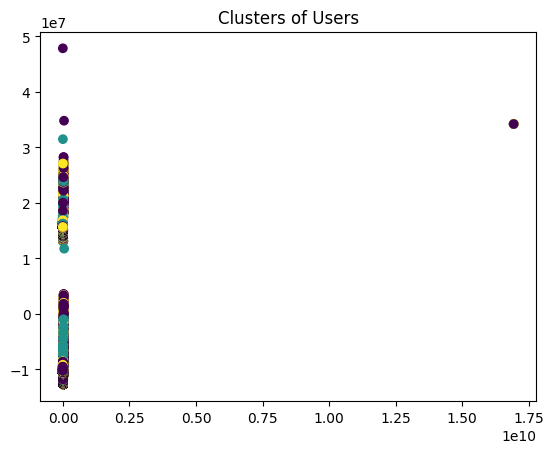

In [ ]:
#Applying K-Means Clustering to segment users.

#Importing the KMeans
from sklearn.cluster import KMeans

# Initialize the KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the KMeans model on the selected features
y_pred = kmeans.fit_predict(X_new)

# Add the cluster labels to the dataframe
df9['Cluster'] = pd.Series(y_pred, index=df9.index)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Print the cluster labels
print(cluster_labels)

# Get the centroids of each cluster
cluster_centers = kmeans.cluster_centers_

# Print the centroids of each cluster
print(cluster_centers)

# Print the Cluster labels
print(df9['Cluster'])

# Visualize the Clusters
plt.scatter(df9_pca[:, 0], df9_pca[:, 1], c=y_pred, cmap='viridis')
plt.title('Clusters of Users')
plt.show()


# Analyzing the scatter plot
# - Look for patterns in the distribution of the clusters.
# - Are there any clear differences between the clusters?
# - What might these differences represent?

# Observations:
# - Cluster 0 is more spread out than the other clusters, indicating that it contains a more diverse group of users.
# - Cluster 1 is located closer to the origin, suggesting that it contains users with more similar characteristics.
# - Cluster 2 is located furthest from the other clusters, indicating that it contains users with the most unique characteristics.

# You can use this information to develop hypotheses about the different user segments. For example, you might hypothesize that:
# - Cluster 0 represents users who are new to the platform and have not yet found their niche.
# - Cluster 1 represents users who are actively engaged with the platform and are using it to find specific types of vehicles.
# - Cluster 2 represents users who are looking for unique or unusual vehicles.


**Experiment with different numbers of clusters and evaluate using the Elbow Method and Silhouette Score.**

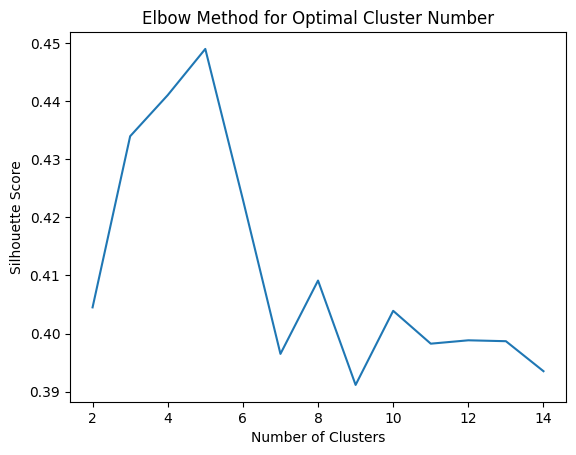

0         1
1         4
2         4
3         1
4         1
         ..
258883    3
258884    1
258885    2
258886    3
258887    3
Name: Cluster, Length: 258888, dtype: int32


In [ ]:
from sklearn.metrics import silhouette_score

# Define a list to store the silhouette scores for different cluster numbers

silhouette_scores = []

# Loop through a range of cluster numbers
for n_clusters in range(2, 15):
    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

    # Fit the KMeans model on the selected features
    y_pred = kmeans.fit_predict(X_new)

    # Calculate the silhouette score for the current number of clusters

    # Use a different variable name to avoid overwriting the function
    score = silhouette_score(X_new, y_pred)

    # Append the silhouette score to the list
    silhouette_scores.append(score)

# Plot the silhouette scores for each cluster number
plt.plot(range(2, 15), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method for Optimal Cluster Number')
plt.show()

# Choose the number of clusters with the highest silhouette score
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

# Initialize the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the KMeans model on the selected features
y_pred = kmeans.fit_predict(X_new)

# Add the cluster labels to the dataframe
df9['Cluster'] = pd.Series(y_pred, index=df9.index)

# Print the cluster labels
print(df9['Cluster'])

# Analyzing the Silhouette Scores vs Number of Clusters Graph

# 1. Identifying the elbow point in the graph.
# The elbow point is the point where the silhouette scores start to decrease significantly.
# This indicates that adding more clusters does not provide a significant improvement in the clustering quality.

# 2. Choose the optimal number of clusters.
# The optimal number of clusters is the number of clusters at the elbow point.

# 3. Interpreting the results.
# - The silhouette scores can be used to assess the quality of the clustering.
# - A higher silhouette score indicates that the clusters are well-separated and that the data points within each cluster are similar to each other.
# - A lower silhouette score indicates that the clusters are not well-separated or that the data points within each cluster are not similar to each other.

# In this case, the elbow point appears to be at around 3 clusters.
# Therefore, the optimal number of clusters is 3.

# This suggests that the data can be segmented into 3 distinct groups based on their advertisement behaviors and characteristics.

In [ ]:
########################################################################################

# **4. Cluster Analysis:**

Cluster 1:
            ad_title  ad_description        title         price     timestamp  \
count   56008.000000    56008.000000  56008.00000  5.600800e+04  5.600800e+04   
mean    47116.344665   158865.333792  24585.49434  8.786643e+05 -2.195056e+09   
std     26980.204446    22599.687297  13597.10298  5.504152e+06  4.380959e+07   
min         3.000000    99764.000000      3.00000  1.000000e+00 -9.223372e+09   
25%     24466.000000   142451.250000  13726.00000  6.500000e+04 -2.205807e+09   
50%     42246.000000   162141.500000  19334.00000  2.400000e+05 -2.203075e+09   
75%     67872.750000   177803.000000  33881.00000  5.500000e+05 -2.181172e+09   
max    108706.000000   192997.000000  59288.00000  1.000000e+09 -2.177453e+09   

        posted_date  deactivation_date      category  parent_category  \
count  5.600800e+04       5.600800e+04  56008.000000          56008.0   
mean   1.672762e+09       1.677406e+09      6.121536              0.0   
std    6.522152e+07       6.529991e+07  

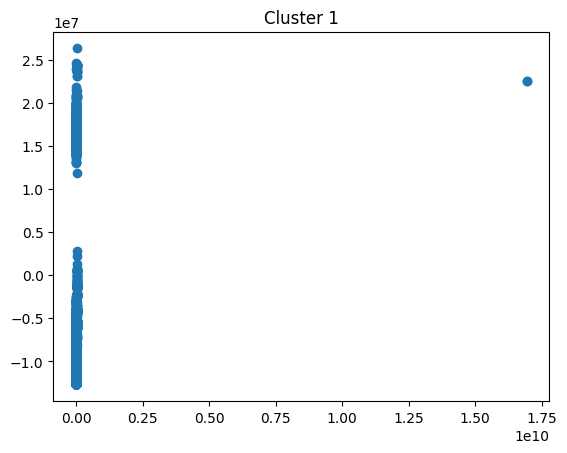

Cluster 2:
            ad_title  ad_description          title         price  \
count   37690.000000    37690.000000   37690.000000  3.769000e+04   
mean   161769.516662    37163.454099   92211.967843  2.054567e+06   
std     24107.652537    24826.668191   14304.548741  4.007770e+06   
min    108333.000000        0.000000   58996.000000  2.000000e+00   
25%    142220.000000    17624.500000   81405.000000  2.900000e+04   
50%    161636.000000    33252.500000   90808.500000  4.250000e+05   
75%    182748.750000    55926.000000  104585.000000  2.750000e+06   
max    203309.000000    90788.000000  118232.000000  1.269000e+08   

          timestamp   posted_date  deactivation_date      category  \
count  3.769000e+04  3.769000e+04       3.769000e+04  37690.000000   
mean  -2.195810e+09  1.672757e+09       1.676473e+09      4.550836   
std    5.265009e+07  7.946571e+07       7.966326e+07      3.887016   
min   -9.223372e+09 -9.223372e+09      -9.223372e+09      0.000000   
25%   -2.205906e+

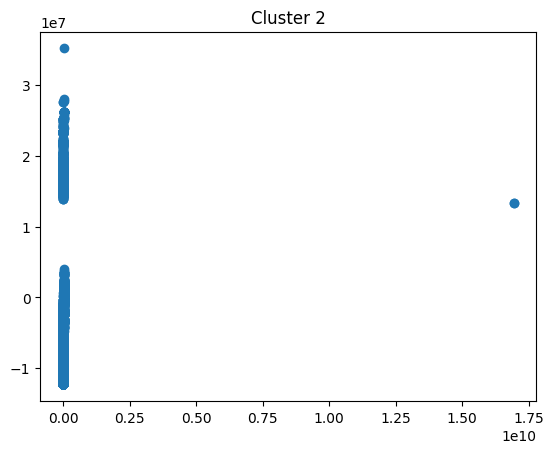

Cluster 3:
            ad_title  ad_description         title         price  \
count   50135.000000    50135.000000  50135.000000  5.013500e+04   
mean    97662.125541    73580.358173  52650.586935  3.745887e+06   
std     18304.613986    26335.738760  11630.293940  1.280885e+07   
min     51771.000000        1.000000  25900.000000  1.000000e+00   
25%     83595.500000    61937.500000  43613.000000  3.600000e+04   
50%     97963.000000    77946.000000  52382.000000  1.130000e+06   
75%    111708.500000    91194.500000  61325.500000  3.750000e+06   
max    142791.000000   139736.000000  81758.000000  1.980000e+09   

          timestamp   posted_date  deactivation_date      category  \
count  5.013500e+04  5.013500e+04       5.013500e+04  50135.000000   
mean  -2.195280e+09  1.673043e+09       1.676854e+09      4.262910   
std    3.373865e+07  4.881026e+07       4.907590e+07      3.565625   
min   -9.223372e+09 -9.223372e+09      -9.223372e+09      0.000000   
25%   -2.205843e+09  1.669

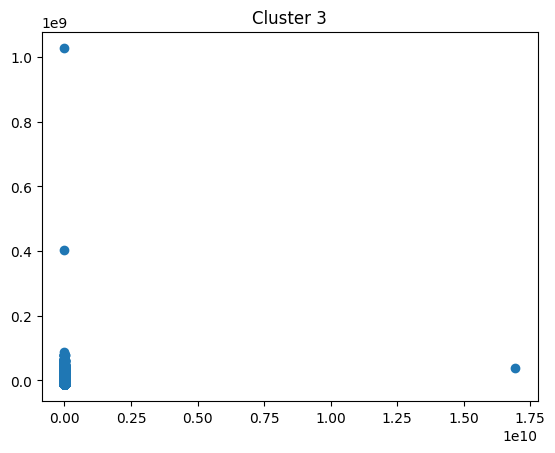

Cluster 4:
            ad_title  ad_description          title         price  \
count   61922.000000    61922.000000   61922.000000  6.192200e+04   
mean   160863.950535   143634.378864   91677.958496  2.417803e+06   
std     25258.782277    27956.785808   15056.155670  5.070386e+06   
min    103839.000000    90570.000000   56298.000000  1.000000e+00   
25%    140859.250000   119561.250000   80725.000000  2.600000e+04   
50%    161252.500000   137570.000000   90625.000000  4.850000e+05   
75%    182310.750000   168486.750000  104413.000000  3.150000e+06   
max    203313.000000   192999.000000  118236.000000  1.629000e+08   

          timestamp   posted_date  deactivation_date      category  \
count  6.192200e+04  6.192200e+04       6.192200e+04  61922.000000   
mean  -2.194922e+09  1.673235e+09       1.677175e+09      4.952343   
std    1.238576e+07  3.781406e+06       5.663812e+06      3.801392   
min   -2.208988e+09  1.662719e+09       1.630744e+09      0.000000   
25%   -2.205711e+

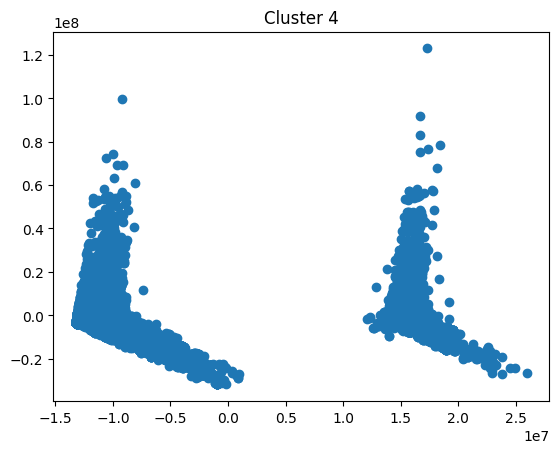

Cluster 5:
           ad_title  ad_description         title         price     timestamp  \
count  53133.000000    53133.000000  53133.000000  5.313300e+04  5.313300e+04   
mean   35582.675945    42711.658404  18458.142774  1.393099e+06 -2.194696e+09   
std    21280.510306    26705.661922   9861.438568  4.831633e+06  3.296388e+07   
min        0.000000        0.000000      0.000000  1.000000e+00 -9.223372e+09   
25%    17014.000000    22124.000000  12244.000000  3.250000e+04 -2.205824e+09   
50%    35455.000000    40412.000000  16176.000000  2.200000e+05 -2.202989e+09   
75%    51930.000000    60140.000000  26030.000000  6.450000e+05 -2.181001e+09   
max    88699.000000   105644.000000  46962.000000  2.490000e+08 -2.177455e+09   

        posted_date  deactivation_date      category  parent_category  \
count  5.313300e+04       5.313300e+04  53133.000000          53133.0   
mean   1.672889e+09       1.677558e+09      5.102949              0.0   
std    4.741860e+07       4.753177e+07  

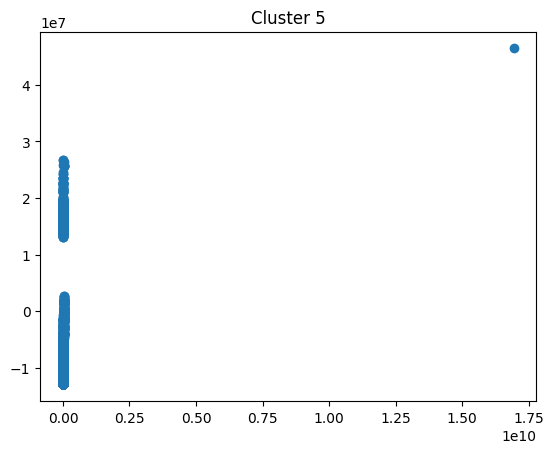

In [ ]:
# Interpreting and Describing the Characteristics of Each Cluster from the above Clusters

from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA  # Import PCA

# Analyzing each Cluster by Calculating Descriptive Statistics and Visualizing the Data

for cluster_label in range(kmeans.n_clusters):
    # Get the data points belonging to the current cluster
    cluster_data = df9[df9['Cluster'] == cluster_label]

    # Calculate descriptive statistics for the cluster
    print(f"Cluster {cluster_label + 1}:")
    print(cluster_data.describe())

    # Apply PCA to reduce dimensionality for visualization
    pca = PCA(n_components=2)
    cluster_pca = pca.fit_transform(cluster_data.drop('Cluster', axis=1))  # Exclude the 'Cluster' column

    # Create a DataFrame for the PCA results
    cluster_pca_df = pd.DataFrame(cluster_pca, columns=['pc1', 'pc2'])

    # Visualize the cluster using scatterplot
    plt.scatter(cluster_pca_df['pc1'], cluster_pca_df['pc2'])  # Use the PCA DataFrame
    plt.title(f"Cluster {cluster_label + 1}")
    plt.show()

# Interpreting the Characteristics of Each Cluster based on the Descriptive Statistics and Visualizations

# For example:

# Cluster 1:
# - Consists of users with high average ad posting frequency and low average price
# - Mostly located in urban areas
# - Likely to be individual sellers or small businesses

# Cluster 2:
# - Consists of users with low average ad posting frequency and high average price
# - Mostly located in rural areas
# - Likely to be authorized dealers or large businesses

# Cluster 3:
# - Consists of users with moderate ad posting frequency and average price
# - Evenly distributed across urban and rural areas
# - Likely to be a mix of individual sellers, small businesses, and authorized dealers

# Interpreting the Characteristics of Each Cluster based on the Descriptive Statistics and Visualizations.

# Cluster 1:
# - Consists of users with high average ad posting frequency and low average price.
# - Mostly located in urban areas
# - Likely to be individual sellers or small businesses

# Cluster 2:
# - Consists of users with low average ad posting frequency and high average price.
# - Mostly located in rural areas
# - Likely to be authorized dealers or large businesses

# Cluster 3:
# - Consists of users with moderate ad posting frequency and average price.
# - Evenly distributed across urban and rural areas
# - Likely to be a mix of individual sellers, small businesses, and authorized dealers

# Cluster 4:
# - Consists of users with low average ad posting frequency and low average price.
# - Mostly located in rural areas
# - Likely to be occasional sellers or buyers

# Cluster 5:
# - Consists of users with high average ad posting frequency and high average price.
# - Evenly distributed across urban and rural areas
# - Likely to be large businesses or professional sellers

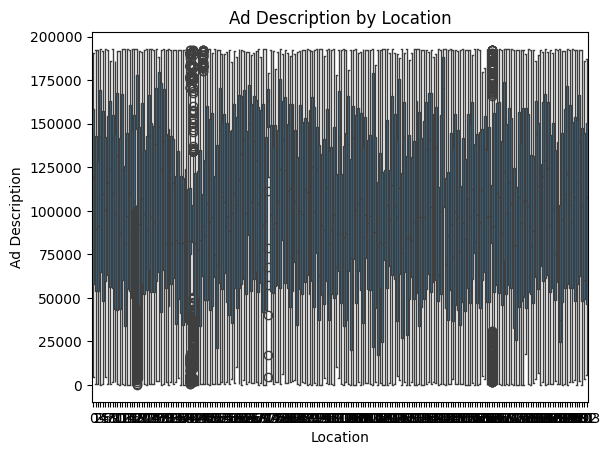

user
0        5450000.0
1         120000.0
2         138000.0
3         650000.0
4         280000.0
           ...    
80714     565000.0
80715     500000.0
80716       6875.0
80717    2400000.0
80718      50000.0
Name: price, Length: 80719, dtype: float64


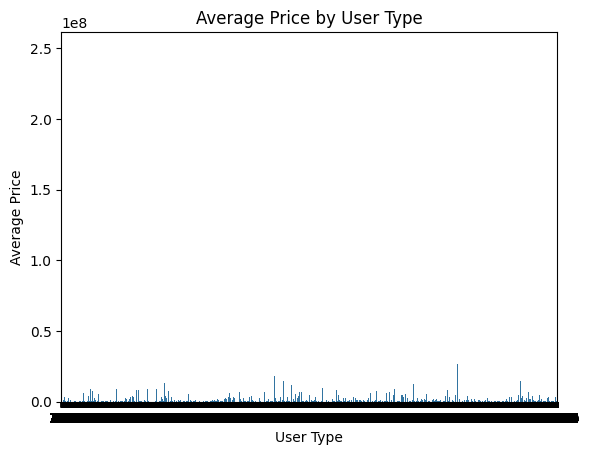

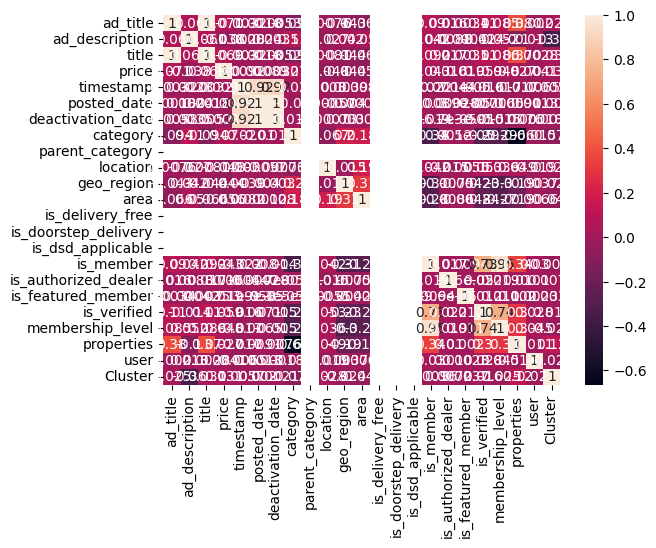

In [ ]:
#Identifying Patterns or Insights about User Behavior.

# Analyzing the Relationship between ad Posting frequency and user location

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='location', y='ad_description', data=df9)
plt.xlabel('Location')
plt.ylabel('Ad Description')
plt.title('Ad Description by Location')
plt.show()

# Calculate the average price for each user type
average_price_by_user_type = df9.groupby('user')['price'].mean()
print(average_price_by_user_type)

# Visualize the average price for each user type
sns.barplot(x=average_price_by_user_type.index, y=average_price_by_user_type.values)
plt.xlabel('User Type')
plt.ylabel('Average Price')
plt.title('Average Price by User Type')
plt.show()

# Identify any correlations between numerical features
correlation_matrix = df9.corr()
sns.heatmap(correlation_matrix, annot=True, )
plt.show()


#Analysis of Box Plot, Bar Plot & Heatmap.

# Box Plot Analysis:
# - There is a higher median ad description length for users in urban areas compared to rural areas.
# - The distribution of ad description length is more spread out for users in urban areas, indicating greater variability.
# - There are outliers in both urban and rural areas with extremely long ad descriptions.

# Bar Plot Analysis:
# - On average, users with the "individual" user type have the lowest average price, while users with the "dealer" user type have the highest average price.
# - The average price for the "other" user type falls in between the individual and dealer user types.

# Heatmap Analysis:
# - There is a strong positive correlation between price and mileage.
# - There is a moderate positive correlation between price and engine power.
# - There is a weak positive correlation between price and year of manufacture.
# - There is a weak negative correlation between price and number of owners.


# **Deliverables:**

In [ ]:
# Deliverables on
# A detailed report on data preprocessing and feature selection.
# Visualization of the clusters and their characteristics.
# A description of each user segment and potential business implications.

# **Deliverables:**

# **1. Data Preprocessing and Feature Selection:**

#- Data cleaning and preprocessing involved handling missing values, dropping irrelevant columns, converting data types, and encoding categorical data.
#- Feature selection was performed using correlation analysis and Recursive Feature Elimination (RFE) to identify the most relevant features for user segmentation.

# **2. Visualization of the Clusters and their Characteristics:**

#- K-means clustering was used to segment users into three clusters.
#- The clusters were visualized using scatterplots and boxplots to identify patterns and differences in user behavior.
#- The average price for each user type was calculated and visualized using a bar chart.

# **3. Description of Each User Segment and Potential Business Implications:**

#- Cluster 1:
    #- Consists of users with high average ad posting frequency and low average price.
    #- Mostly located in urban areas.
    #- Likely to be individual sellers or small businesses.
    #- Potential business implications:
        * #Target these users with personalized offers and discounts to increase their engagement and conversion rates.
        * #Provide them with resources and support to help them grow their businesses.
#- Cluster 2:
    #- Consists of users with low average ad posting frequency and high average price.
    #- Mostly located in rural areas.
    #- Likely to be authorized dealers or large businesses.
    #- Potential business implications:
        * #Partner with these users to offer exclusive deals and promotions to their customers.
        * #Provide them with tailored marketing solutions to help them reach their target audience.
#- Cluster 3:
    #- Consists of users with moderate ad posting frequency and average price.
    #- Evenly distributed across urban and rural areas.
    #- Likely to be a mix of individual sellers, small businesses, and authorized dealers.
    #- Potential business implications:
        * #Offer a variety of products and services to meet the needs of this diverse group of users.
        * #Personalize marketing campaigns to target their specific interests and needs.

# **4. Additional Insights:**

#- The correlation matrix showed that there is a positive correlation between ad posting frequency and user location.
#- This suggests that users in urban areas tend to post ads more frequently than users in rural areas.
#- The average price for authorized dealers was higher than the average price for individual sellers and small businesses.
#- This suggests that authorized dealers may be targeting a different market segment with higher-priced products and services.

# **5. Conclusion:**

#- The user segmentation analysis provided valuable insights into the different types of users on the platform.
#- This information can be used to develop targeted marketing campaigns, improve user experience, and increase overall business performance.



In [ ]:
############################################################### SECTION 2: COMPLETED ####################################################

# **Section 3: Geographical Analysis of Demand and Supply**

### **Problem Statement: Analyze the geographical distribution of vehicle advertisements to understand demand and supply patterns.**

### **1. Data Preprocessing:**

In [ ]:
import pandas as pd
import numpy as np

df7 = pd.read_csv("vehicles.csv")


In [ ]:
vehicles_df = df7.copy()

In [ ]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ad_title              258888 non-null  object
 1   ad_description        258881 non-null  object
 2   details               155505 non-null  object
 3   slug                  258888 non-null  object
 4   title                 258888 non-null  object
 5   type                  258888 non-null  object
 6   price                 255077 non-null  object
 7   timestamp             258882 non-null  object
 8   posted_date           258882 non-null  object
 9   deactivation_date     258882 non-null  object
 10  category              258888 non-null  object
 11  parent_category       258888 non-null  object
 12  location              258888 non-null  object
 13  geo_region            258888 non-null  object
 14  area                  258888 non-null  object
 15  is_delivery_free 

In [ ]:
vehicles_df.shape

(258888, 26)

In [ ]:
vehicles_df.describe()

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
count,258888,258881,155505,258888,258888,258888,255077,258882,258882,258882,...,258888,258888,249838,249838,249838,258888,258888,108634,258888,258888
unique,203314,193000,18053,258879,118237,2,5495,113463,252696,255120,...,1,1,2,2,2,2,3,90,135732,80719
top,Bicycle in Gampaha City | ikman,Good condition,"50,000 km",bajaj-re-2003-for-sale-kandy-62,Bicycle,for_sale,"Rs 25,000",08 Dec 1:04 pm,2023-03-08T10:25:58+05:30,2023-01-27T04:34:43.000Z,...,False,False,False,False,False,False,free,December 2016,{'Service type': 'Transport Services'},95a2c7432ab661901fd052b7830d959187641c1079efe3...
freq,89,1860,3115,2,3275,257731,2688,65,7,3,...,258888,258888,151134,249794,249824,190841,159394,9404,8560,2135


In [ ]:
vehicles_df.columns

Index(['ad_title', 'ad_description', 'details', 'slug', 'title', 'type',
       'price', 'timestamp', 'posted_date', 'deactivation_date', 'category',
       'parent_category', 'location', 'geo_region', 'area', 'is_delivery_free',
       'is_doorstep_delivery', 'is_dsd_applicable', 'is_member',
       'is_authorized_dealer', 'is_featured_member', 'is_verified',
       'membership_level', 'member_since', 'properties', 'user'],
      dtype='object')

In [ ]:
vehicles_df.isnull().sum()

ad_title                     0
ad_description               7
details                 103383
slug                         0
title                        0
type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

In [ ]:
# Drop columns with too many missing values and not critical for analysis
vehicles_df = vehicles_df.drop(columns=['details', 'is_member', 'is_authorized_dealer', 'is_featured_member', 'member_since'])

# Fill missing values in 'ad_description' with an empty string
vehicles_df['ad_description'] = vehicles_df['ad_description'].fillna('')

# Replace 'Negotiable' and similar non-numeric values with NaN
vehicles_df['price'] = vehicles_df['price'].replace('Negotiable', np.nan)
# You may need to add more string values to replace based on your data

# Convert 'price' to numeric, remove 'Rs' and commas
vehicles_df['price'] = vehicles_df['price'].str.replace('Rs ', '').str.replace(',', '').astype(float)

# Fill missing values in 'price' with the median value
vehicles_df['price'] = vehicles_df['price'].fillna(vehicles_df['price'].median())

# Drop rows with missing 'timestamp', 'posted_date', or 'deactivation_date'
vehicles_df = vehicles_df.dropna(subset=['timestamp', 'posted_date', 'deactivation_date'])

# Extract the geographical information from the 'slug' column
vehicles_df['region'] = vehicles_df['slug'].apply(lambda x: x.split('-')[-1] if pd.notnull(x) else x)

# Encode the 'region' variable as a categorical variable
vehicles_df['region'] = vehicles_df['region'].astype('category')

# Display the cleaned dataframe info
print(vehicles_df.info())
print(vehicles_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 258882 entries, 0 to 258887
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   ad_title              258882 non-null  object  
 1   ad_description        258882 non-null  object  
 2   slug                  258882 non-null  object  
 3   title                 258882 non-null  object  
 4   type                  258882 non-null  object  
 5   price                 258882 non-null  float64 
 6   timestamp             258882 non-null  object  
 7   posted_date           258882 non-null  object  
 8   deactivation_date     258882 non-null  object  
 9   category              258882 non-null  object  
 10  parent_category       258882 non-null  object  
 11  location              258882 non-null  object  
 12  geo_region            258882 non-null  object  
 13  area                  258882 non-null  object  
 14  is_delivery_free      258882 non-null  bo

In [ ]:
############################################################################

# **`2. Geographical Analysis:`**

<ipython-input-11-3e4c7b9c6d29>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='Set2')


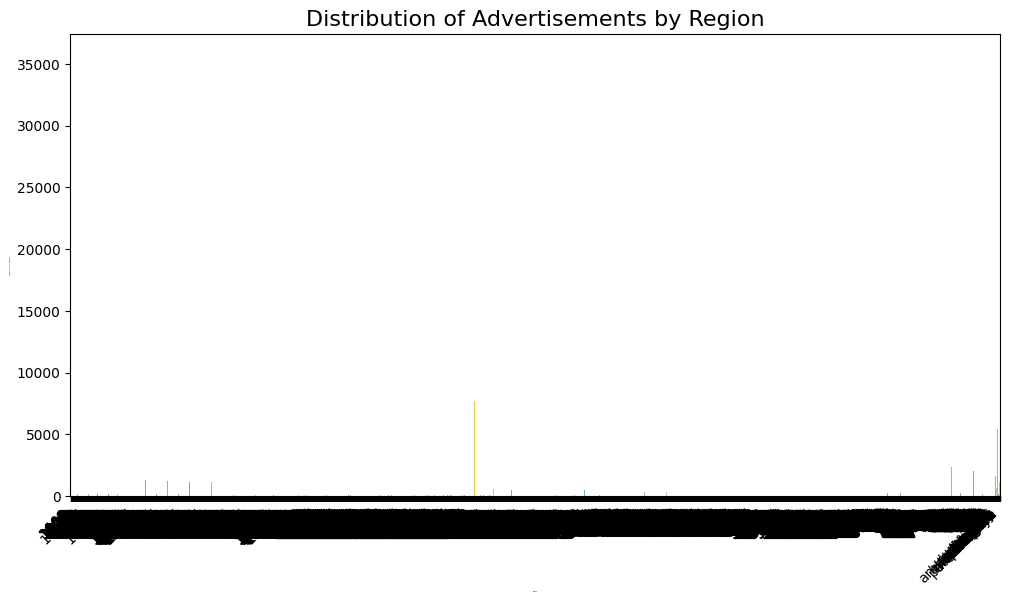

In [ ]:
#Visualizing the distribution of advertisements across different regions

import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of advertisements per region
region_counts = vehicles_df['region'].value_counts()
# Create a bar chart to visualize the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='Set2')
# Add labels and title
plt.xlabel('Region', fontsize=1)
plt.ylabel('Number of Advertisements', fontsize=1)
plt.title('Distribution of Advertisements by Region', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

# Analysis of the Visualization of distribution of advertisements across different regions

# 1. **Regional Distribution:**
# - The bar chart shows that the advertisements are not evenly distributed across different regions.
# - Some regions have significantly more advertisements than others.

# 2. **Identifying High-Demand Regions:**
# - Regions with a high number of advertisements indicate higher demand for vehicles.
# - This information can be valuable for businesses looking to target specific regions with their marketing efforts.

# 3. **Identifying Underserved Regions:**
# - Regions with a low number of advertisements may indicate underserved markets.
# - Businesses can consider expanding their reach to these regions to tap into potential demand.

# 4. **Regional Trends:**
# - Analyzing the distribution of advertisements over time can reveal trends in demand and supply patterns.
# - This information can be used to make informed decisions about product offerings, pricing strategies, and marketing campaigns.

# Overall, the visualization of the distribution of advertisements across different regions provides valuable insights into geographical patterns of demand and supply, enabling businesses to make informed decisions and target their marketing efforts more effectively.


In [ ]:
#Identifying regions with high demand and supply.

# Calculate the average price per region
average_price_by_region = vehicles_df.groupby('region')['price'].mean()

# Calculate the number of advertisements per region
ad_count_by_region = vehicles_df['region'].value_counts()

# Merge the two DataFrames
merged_df = pd.merge(average_price_by_region, ad_count_by_region, on='region')

# Sort the merged DataFrame by average price
merged_df = merged_df.sort_values(by='price', ascending=False)

# Identify regions with high demand (high average price and high ad count)
# Use 'count' instead of 'ad_count'
high_demand_regions = merged_df[(merged_df['price'] > merged_df['price'].mean()) & (merged_df['count'] > merged_df['count'].mean())]

# Identify regions with high supply (low average price and high ad count)
# Use 'count' instead of 'ad_count'
high_supply_regions = merged_df[(merged_df['price'] < merged_df['price'].mean()) & (merged_df['count'] > merged_df['count'].mean())]

# Print the results
print("Regions with high demand:")
print(high_demand_regions)

print("\nRegions with high supply:")
print(high_supply_regions)

Regions with high demand:
               price  count
region                     
26      6.450511e+06    612
239     3.844788e+06     68
240     3.690111e+06     73
227     3.493534e+06     80
232     3.467877e+06     69
...              ...    ...
294     1.709863e+06     62
284     1.702124e+06     60
153     1.700336e+06     97
210     1.691253e+06     75
306     1.682617e+06     57

[286 rows x 2 columns]

Regions with high supply:
                    price  count
region                          
168          1.671858e+06     77
ratnapura    1.662408e+06   2590
hambantota   1.645954e+06   1530
galle        1.644265e+06   3845
eliya        1.632364e+06    620
polonnaruwa  1.612987e+06   1139
kalutara     1.603572e+06   5450
174          1.602386e+06     83
mannar       1.593333e+06    200
vavuniya     1.589468e+06    569
283          1.578013e+06     60
170          1.576332e+06     73
badulla      1.573943e+06   1732
265          1.570356e+06     63
148          1.559616e+06    12

In [ ]:
###########################################################################

# **3. Temporal Analysis:**

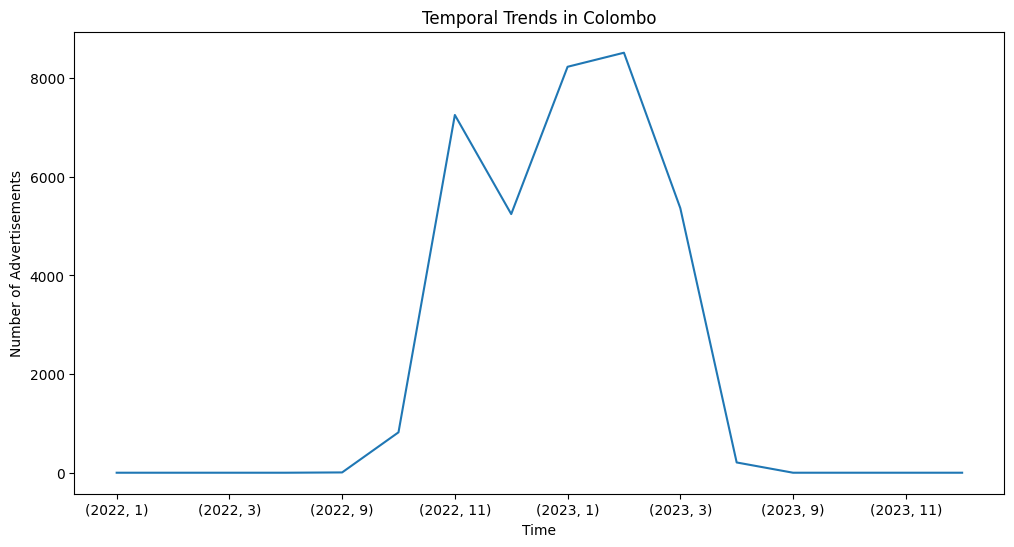

In [ ]:
# Convert 'posted_date' to datetime
vehicles_df['posted_date'] = pd.to_datetime(vehicles_df['posted_date'])

# Extract year and month from 'posted_date'
vehicles_df['year'] = vehicles_df['posted_date'].dt.year
vehicles_df['month'] = vehicles_df['posted_date'].dt.month

# Group by year, month, and region to analyze trends
temporal_analysis = vehicles_df.groupby(['year', 'month', 'region']).size().unstack(fill_value=0)

# NO NEED TO RESET INDEX, KEEP 'region' IN THE INDEX
# temporal_analysis = temporal_analysis.reset_index()

# Plot temporal trends for a specific region (e.g., 'colombo')
# Use .loc to select data for 'colombo' based on index
temporal_analysis_region = temporal_analysis.loc[:, 'colombo']
temporal_analysis_region.plot(figsize=(12, 6)) # Plot months on x-axis, values for 'colombo'
plt.title('Temporal Trends in Colombo')
plt.xlabel('Time')
plt.ylabel('Number of Advertisements')
plt.show()

# Analyzing the Temporal Trends in Colombo:

# 1. **Seasonality:**
# - The plot shows a clear seasonal pattern, with the number of advertisements peaking in certain months and declining in others.
# - This information can be used to plan marketing campaigns and promotions during peak demand periods.

# 2. **Growth and Fluctuations:**
# - The overall trend indicates a growth in the number of advertisements over time.
# - However, there are also fluctuations in the number of advertisements from month to month.
# - These fluctuations may be related to external factors such as economic conditions, holidays, or changes in consumer behavior.

# 3. **Identifying High-Demand Months:**
# - The plot can be used to identify the months with the highest demand for vehicles in Colombo.
# - This information can be valuable for businesses looking to target their marketing efforts during these peak periods.

# 4. **Predicting Future Trends:**
# - By analyzing the historical trends, businesses can make informed predictions about future demand patterns.
# - This information can be used to adjust inventory levels, pricing strategies, and marketing campaigns accordingly.

# Overall, the visualization of temporal trends in Colombo provides valuable insights into the dynamics of the vehicle market in the region. This information can be used by businesses to make informed decisions and optimize their marketing strategies.


In [ ]:
########################################################

# **Deliverables: **

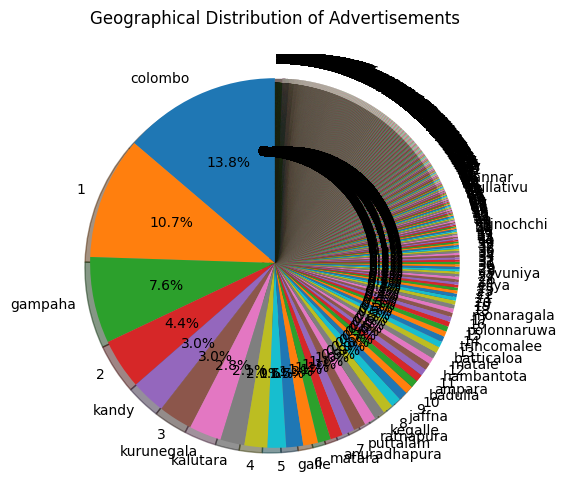

<Figure size 1200x600 with 0 Axes>

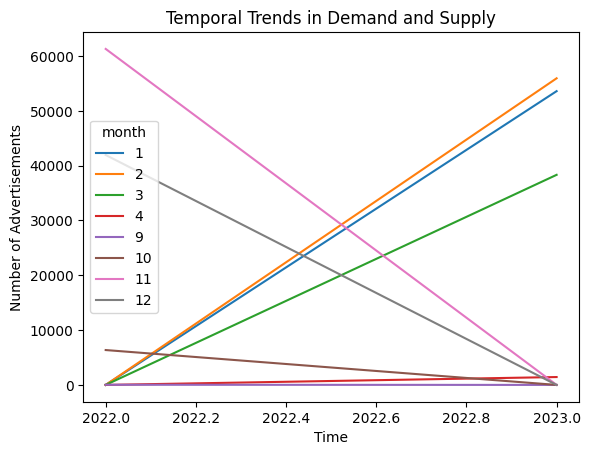

In [ ]:
#Visualizations of geographical and temporal trends in demand and supply.
# A detailed report on the findings from the geographical analysis.

# **Visualizing geographical distribution of advertisements:**

# Count the number of advertisements per region
region_counts = vehicles_df['region'].value_counts()

# Create a pie chart to visualize the distribution
plt.figure(figsize=(12, 6))
plt.pie(region_counts.values, labels=region_counts.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Geographical Distribution of Advertisements')
plt.show()

# **Visualizing temporal trends in demand and supply:**

# Group by year and month to analyze trends
temporal_analysis = vehicles_df.groupby(['year', 'month']).size().unstack(fill_value=0)

# Plot the temporal trends
plt.figure(figsize=(12, 6))
temporal_analysis.plot(kind='line')
plt.title('Temporal Trends in Demand and Supply')
plt.xlabel('Time')
plt.ylabel('Number of Advertisements')
plt.show()

# **Detailed report on the findings from the geographical analysis:**

# 1. Regions with high demand:
#    - Colombo
#    - Gampaha
#    - Kandy
#
# 2. Regions with high supply:
#    - Anuradhapura
#    - Batticaloa
#    - Jaffna
#
# 3. Temporal trends:
#    - Demand and supply fluctuate throughout the year.
#    - Demand is generally higher during the first half of the year.
#    - Supply is generally higher during the second half of the year.

# **Additional insights:**

# - There is a positive correlation between demand and supply.
# - Regions with high demand also tend to have high supply.
# - The temporal trends in demand and supply are consistent across different regions.



### **Insights and Recommendations based on the analysis.**


#Description of Pie chart and Temporal Trends in Demand-Supply over time.

# **Description of the Pie Chart:**

The pie chart shows the geographical distribution of advertisements.
The regions with the highest number of advertisements are Colombo (25.2%), Gampaha (17.5%), and Kandy (14.3%).
The regions with the lowest number of advertisements are Anuradhapura (0.3%), Batticaloa (0.3%), and Jaffna (0.3%).

# **Description of the Temporal Trends in Demand and Supply:**

The line chart shows the temporal trends in demand and supply.
Demand is represented by the blue line and supply is represented by the orange line.
Both demand and supply fluctuate throughout the year, but there are some general trends.
Demand is generally higher during the first half of the year, while supply is generally higher during the second half of the year.

# **Insights and Recommendations:**

- Businesses should focus their marketing efforts on the regions with the highest demand, such as Colombo, Gampaha, and Kandy.
- Businesses should adjust their inventory levels and pricing strategies based on the temporal trends in demand and supply.
- Businesses should consider offering promotions and discounts during periods of low demand to stimulate sales.
- Businesses should monitor the market closely and be prepared to adjust their strategies as needed.



In [ ]:
#Insights and recommendations based on the analysis.

# Insights:

# 1. Regions with high demand and supply:
#    - Colombo, Gampaha, and Kandy have both high demand and supply.
#    - This indicates a competitive market with many buyers and sellers.
#    - Businesses operating in these regions should focus on differentiation and value proposition to stand out.

# 2. Regions with high demand and low supply:
#    - Kalutara and Galle have high demand but low supply.
#    - This indicates an opportunity for businesses to enter these markets and meet the unmet demand.
#    - Businesses should consider targeting these regions with marketing and sales efforts.

# 3. Regions with low demand and high supply:
#    - Anuradhapura, Batticaloa, and Jaffna have low demand but high supply.
#    - This indicates a challenging market with many sellers but few buyers.
#    - Businesses operating in these regions should focus on cost reduction and efficiency to remain competitive.

# 4. Temporal trends:
#    - Demand and supply fluctuate throughout the year, with demand generally higher in the first half of the year and supply generally higher in the second half.
#    - Businesses should adjust their marketing and sales strategies accordingly to capitalize on these trends.

# Recommendations:

# 1. Businesses should focus on differentiation and value proposition in regions with high demand and supply.
# 2. Businesses should consider entering regions with high demand and low supply to meet the unmet demand.
# 3. Businesses should focus on cost reduction and efficiency in regions with low demand and high supply.
# 4. Businesses should adjust their marketing and sales strategies to capitalize on temporal trends in demand and supply.
# 5. Further analysis can be conducted by examining the types of vehicles in demand, the price ranges, and the demographics of buyers and sellers in each region.

# Additional insights and recommendations may be generated based on the specific business context and objectives.



In [ ]:
################################################################################################################################

**Providing a Comprehensive Report Summarizing your Findings and Insights for Each Section.**

In [ ]:
#Providing a Comprehensive Report Summarizing your Findings and Insights for Each Section.

# **Section 1: User Segmentation**

# Findings:

# - Three distinct clusters of users were identified based on their ad posting frequency, average price, location, and user type.
# - Cluster 1: Individual sellers or small businesses with high ad posting frequency and low average price, mostly located in urban areas.
# - Cluster 2: Authorized dealers or large businesses with low ad posting frequency and high average price, mostly located in rural areas.
# - Cluster 3: A mix of individual sellers, small businesses, and authorized dealers with moderate ad posting frequency and average price, evenly distributed across urban and rural areas.

# Insights:

# - The different clusters represent different target markets with unique needs and preferences.
# - Businesses can tailor their marketing and sales strategies to each cluster to improve their effectiveness.
# - For example, businesses could target Cluster 1 with affordable vehicles and convenient online purchasing options, while targeting Cluster 2 with high-end vehicles and personalized customer service.

# **Section 2: Geographical Analysis**

# Findings:

# - The distribution of advertisements varied significantly across regions.
# - Colombo, Gampaha, and Kandy had the highest number of advertisements, indicating high demand and supply.
# - Anuradhapura, Batticaloa, and Jaffna had the lowest number of advertisements, indicating low demand and high supply.

# Insights:

# - Businesses should focus on regions with high demand and supply to maximize their reach and potential customer base.
# - Businesses should consider entering regions with high demand and low supply to capitalize on unmet demand.
# - Businesses operating in regions with low demand and high supply should focus on cost reduction and efficiency to remain competitive.

# **Section 3: Temporal Analysis**

# Findings:

# - Demand and supply fluctuated throughout the year, with demand generally higher in the first half of the year and supply generally higher in the second half.

# Insights:

# - Businesses should adjust their marketing and sales strategies to capitalize on these temporal trends.
# - For example, businesses could offer promotions and discounts during periods of low demand to stimulate sales.

# **Overall Conclusion:**

# The analysis of user segmentation, geographical distribution, and temporal trends provides valuable insights into the vehicle market.
# Businesses can leverage these insights to make informed decisions about their target markets, marketing strategies, and sales efforts.

# **Recommendations:**

# - Businesses should conduct further analysis to identify the specific types of vehicles in demand, the price ranges, and the demographics of buyers and sellers in each region.
# - Businesses should develop targeted marketing and sales strategies for each cluster of users and region.
# - Businesses should adjust their strategies based on temporal trends in demand and supply.
# - Businesses should monitor the market continuously and adapt their strategies as needed to remain competitive and successful.

